# **Project - Credit Risk Analysis**

## Problem Statement

**Business Objectives**

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of the loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

**Data Set**

1.'application_data.csv'  contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.
 
2.'previous_application.csv' contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.
 
3.'columns_description.csv' is data dictionary which describes the meaning of the variables.

### Importing libraries and assessing structure of the dataset

In [160]:
#load required libraries to perfrorm EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

**load the datasets and name dataframes for better readability**

app_df = application_data,

prev_df = previous_application,

desc_df = columns_description

In [162]:
app_df=pd.read_csv("application_data.csv")
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [163]:
#columns_description.csv gives the description of the column names of above datasets
desc_df=pd.read_csv("columns_description.csv", encoding="ISO-8859-1",index_col=0)#Utf-8 encoded
desc_df.head()

,Table,Row,Description,Special
1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
6,application_data,CODE_GENDER,Gender of the client,NaN
7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


## Understanding the Data:
`SK_ID_CURR`:ID of loan in our sample. This unique ID for each row doesn't influence the target variable.


## **Data Understanding - Application Dataset (`application_data.csv`)**

### **1. Dataset Overview**
The **application dataset** contains client-related information at the time of loan application. It helps in **credit risk assessment** by providing insights into demographics, employment status, income details, credit history, and loan characteristics.

- **Total Rows:** 307,511  
- **Total Columns:** 122  
- **Target Variable:** `TARGET`
  - `0` → Client **did not** have payment difficulties.
  - `1` → Client **had** payment difficulties (defaulted).  

#### **Column Types:**
- **Numerical:** 65 columns (e.g., `AMT_INCOME_TOTAL`, `DAYS_BIRTH`, `DAYS_EMPLOYED`).
- **Categorical:** 16 columns (e.g., `NAME_CONTRACT_TYPE`, `OCCUPATION_TYPE`).
- **Boolean/Flag:** 21 columns (e.g., `FLAG_OWN_CAR`, `FLAG_DOCUMENT_3`).

---

### **2. Key Columns in the Dataset**
| **Category** | **Column Names** | **Description** |
|-------------|----------------|----------------|
| **Client ID** | `SK_ID_CURR` | Unique ID for each applicant |
| **Loan Information** | `NAME_CONTRACT_TYPE`, `AMT_CREDIT`, `AMT_ANNUITY` | Type of loan, credit amount, and annuity |
| **Demographics** | `CODE_GENDER`, `NAME_FAMILY_STATUS`, `CNT_CHILDREN` | Gender, marital status, number of children |
| **Income & Employment** | `AMT_INCOME_TOTAL`, `DAYS_EMPLOYED`, `OCCUPATION_TYPE` | Total income, employment duration, job type |
| **Credit Risk Indicators** | `EXT_SOURCE_1`, `EXT_SOURCE_2`, `EXT_SOURCE_3` | External risk ratings for clients |
| **Loan History** | `DAYS_CREDIT`, `DAYS_LAST_PHONE_CHANGE`, `AMT_GOODS_PRICE` | Credit history length, last phone change, loan amount for goods |
| **Flag Indicators** | `FLAG_OWN_CAR`, `FLAG_OWN_REALTY`, `FLAG_DOCUMENT_*` | Boolean flags indicating car/house ownership and submitted documents |
| **Region & Housing** | `REGION_POPULATION_RELATIVE`, `NAME_HOUSING_TYPE` | Regional population density, housing situation |

---

### **3. Data Quality Issues Identified**
| **Issue** | **Details** |
|----------|------------|
| **Missing Values** | Some variables have **significant missing values** (e.g., `OCCUPATION_TYPE` ~ 31%, `EXT_SOURCE_2` ~ 21%) |
| **Negative Values** | Columns like `DAYS_BIRTH` and `DAYS_EMPLOYED` are **negative**, requiring absolute value transformation |
| **Imbalanced Data** | The target variable (`TARGET`) is highly imbalanced (Only ~8% default cases) |
| **Redundant Columns** | Many `FLAG_DOCUMENT_*` columns have little impact on analysis and can be removed |

---

### **4. Business Insights from Data**
1. **Income vs. Loan Amount:**  
   - Higher-income clients tend to receive **higher loan amounts**.
   - But high-income does not necessarily mean **low risk** of default.

2. **Age & Employment Stability:**  
   - Older clients and those with stable jobs (low `DAYS_EMPLOYED`) **default less**.
   - Young applicants with short job tenure have a **higher risk** of default.

3. **External Risk Sources (`EXT_SOURCE_2 & 3`)**  
   - Highly correlated with **loan repayment behavior**.
   - Lower external risk scores indicate **higher chances of default**.

4. **Housing & Car Ownership:**  
   - Clients who **own houses** are generally lower risk.
   - Car ownership alone does not strongly indicate default risk.

---

## **5. Next Steps for Analysis**
1. **Handle missing values** (Imputation using mode/median where necessary).
2. **Remove unnecessary features** (e.g., `FLAG_DOCUMENT_*`).
3. **Check data imbalance** (Perform resampling if needed).
4. **Perform EDA** (Visualize distributions, correlations, and outliers).
5. **Feature Engineering** (Create new variables if needed, such as `AGE` from `DAYS_BIRTH`).


**Previous Application Data (previous_application.csv)**
This dataset captures details of clients’ previous loan applications. Each row represents a loan application, with information on its status, type, payment methods, and amount requested.

`Key Attributes:`

`NAME_CONTRACT_TYPE`: Type of loan (Cash loans, Revolving loans, etc.)

`AMT_APPLICATION`, `AMT_CREDIT`, `AMT_ANNUITY`: Financial metrics from previous loans

`NAME_CONTRACT_STATUS`: Status of previous loan applications (Approved, Refused, Canceled, etc.)

`DAYS_DECISION`: Days since the application decision (negative values indicate past events)

**Business Relevance:**

A history of rejected loans or missed payments indicates higher risk.
Frequent loan applications may suggest financial instability.
The gap between requested and approved amounts reflects the lender's risk assessment.

In [167]:
pd.set_option('display.max_rows', None)

In [168]:
#data shape
app_df.shape

(307511, 122)

In [169]:
app_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [170]:
app_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [171]:
#check the null count/missing values
app_df.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [172]:
#percentage of missing values
app_df.isna().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

## Selecting Features required for Analysis and Dealing with missing value

In [174]:
#Observations: 
#We can see more than 40% records having missing data whch can be dropped
missing_col = app_df.columns[app_df.isna().mean() * 100 >= 40].to_list()
len(missing_col)

49

In [175]:
app = app_df.drop(columns=missing_col) 
app.shape
type(app)

pandas.core.frame.DataFrame

WE observe some FLAG_DOCUMENTS in the dataset. To observe its significance , lets find its correlation with target

In [177]:
flag_columns = [col for col in app.columns if col.startswith("FLAG_DOCUMENT")]
flag_columns

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [178]:
flag_correlation = app[flag_columns + ['TARGET']].corr()['TARGET'].drop('TARGET')
print(flag_correlation.sort_values(ascending=False))


FLAG_DOCUMENT_3     0.044346
FLAG_DOCUMENT_2     0.005417
FLAG_DOCUMENT_21    0.003709
FLAG_DOCUMENT_20    0.000215
FLAG_DOCUMENT_5    -0.000316
FLAG_DOCUMENT_12   -0.000756
FLAG_DOCUMENT_19   -0.001358
FLAG_DOCUMENT_10   -0.001414
FLAG_DOCUMENT_7    -0.001520
FLAG_DOCUMENT_4    -0.002672
FLAG_DOCUMENT_17   -0.003378
FLAG_DOCUMENT_11   -0.004229
FLAG_DOCUMENT_9    -0.004352
FLAG_DOCUMENT_15   -0.006536
FLAG_DOCUMENT_18   -0.007952
FLAG_DOCUMENT_8    -0.008040
FLAG_DOCUMENT_14   -0.009464
FLAG_DOCUMENT_13   -0.011583
FLAG_DOCUMENT_16   -0.011615
FLAG_DOCUMENT_6    -0.028602
Name: TARGET, dtype: float64


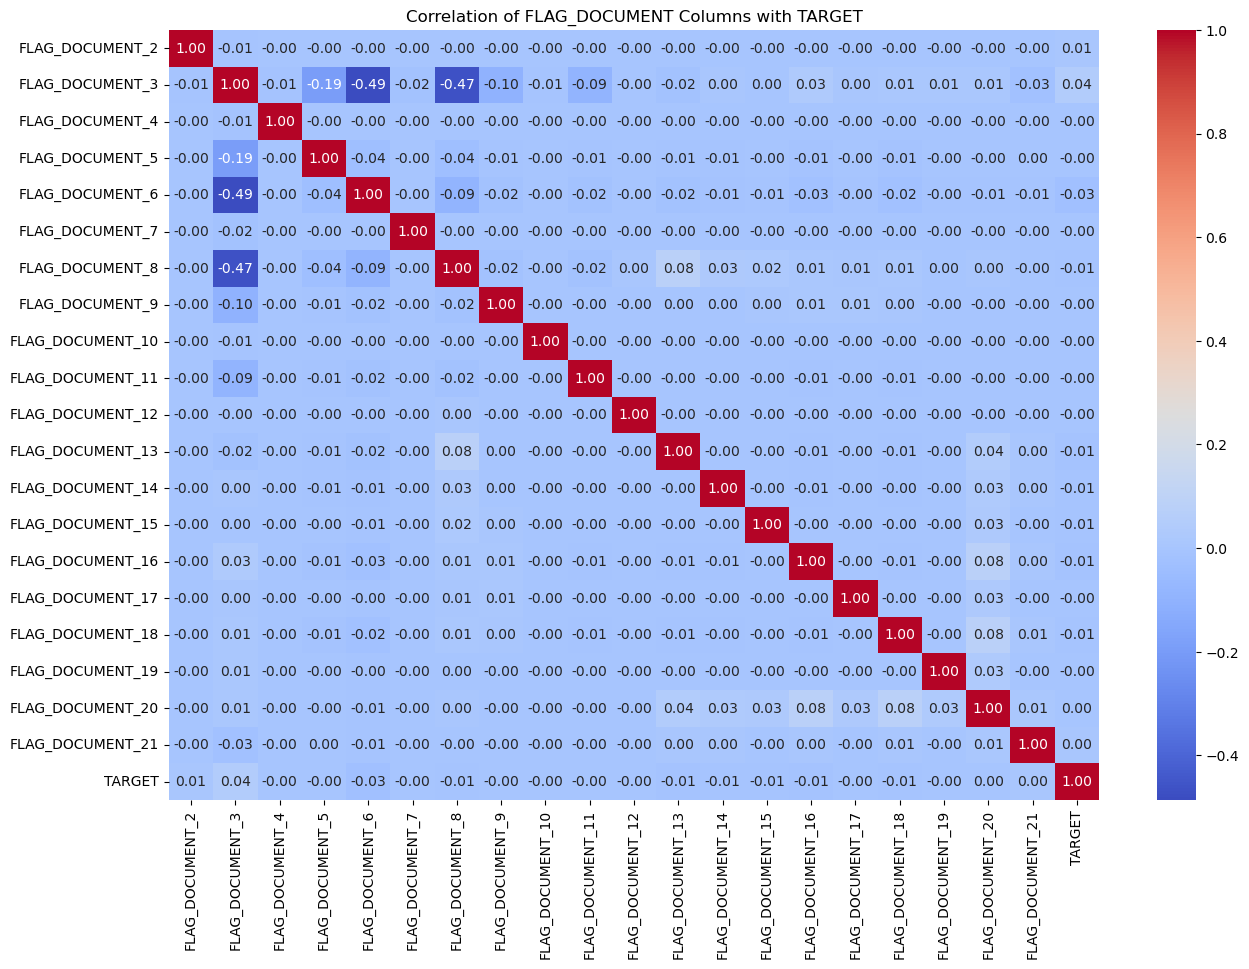

In [179]:
plt.figure(figsize=(15, 10))
sns.heatmap(app[flag_columns + ['TARGET']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of FLAG_DOCUMENT Columns with TARGET")
plt.show()

**Observations:**
    FLAG_DOCUMENTS have very less significance on TARGET variable. Hence, it can be dropped or ignored

In [181]:
app.drop(columns=flag_columns, inplace=True)
print(app.shape)

(307511, 53)


Check the relationship of Flags with Target

In [183]:
Flag=[col for col in app.columns if col.startswith("FLAG_")]
app[Flag+["TARGET"]].head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,TARGET
0,N,Y,1,1,0,1,1,0,1
1,N,N,1,1,0,1,1,0,0
2,Y,Y,1,1,1,1,1,0,0
3,N,Y,1,1,0,1,0,0,0
4,N,Y,1,1,0,1,0,0,0


In [184]:
app["FLAG_OWN_CAR"]=app["FLAG_OWN_CAR"].apply(lambda x: 1 if x=="Y" else 0)

In [185]:
app["FLAG_OWN_REALTY"]=app["FLAG_OWN_REALTY"].apply(lambda x: 1 if x=="Y" else 0)

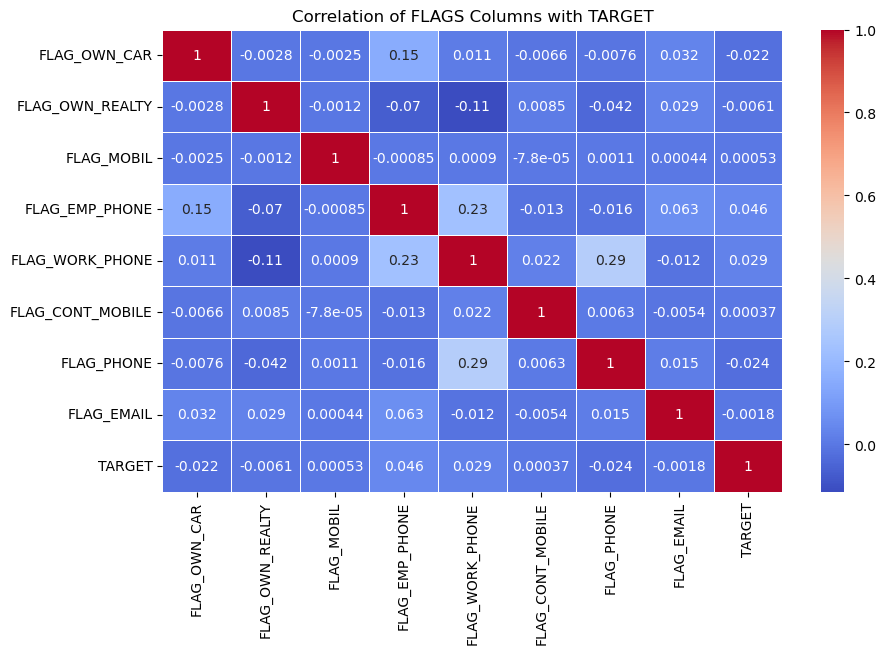

In [186]:
flag_corr = app[Flag + ['TARGET']].corr()['TARGET'].drop('TARGET')
plt.figure(figsize=(10,6))
sns.heatmap(app[Flag + ['TARGET']].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation of FLAGS Columns with TARGET")
plt.show()

In [187]:
#As we don't see significance correlation we can drop flag columns
app=app.drop(columns=Flag,axis=1,)
app.shape

(307511, 45)

In [188]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
   

`OBS_30_CNT_SOCIAL_CIRCLE` → Number of people in the applicant's social circle with observable credit defaults (30+ days past due).
`DEF_30_CNT_SOCIAL_CIRCLE `→ Number of actual defaults (confirmed) within this group.
`OBS_60_CNT_SOCIAL_CIRCLE `→ Number of people in the applicant's social circle with at least one credit default of 60+ days past due (observed).
`DEF_60_CNT_SOCIAL_CIRCLE `→ Number of people in the applicant's social circle who have actually defaulted with 60+ days past due (confirmed).
🔹 **Business Interpretation**
If a borrower has a higher number of people in their social circle who have defaulted, they might be at a higher risk of defaulting themselves.
Banks may use this as an indirect risk indicator to assess creditworthiness.


In [190]:
Observable_cr_default=["OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE"]
app[Observable_cr_default+["TARGET"]].corr()["TARGET"]

OBS_30_CNT_SOCIAL_CIRCLE    0.009131
DEF_30_CNT_SOCIAL_CIRCLE    0.032248
OBS_60_CNT_SOCIAL_CIRCLE    0.009022
DEF_60_CNT_SOCIAL_CIRCLE    0.031276
TARGET                      1.000000
Name: TARGET, dtype: float64

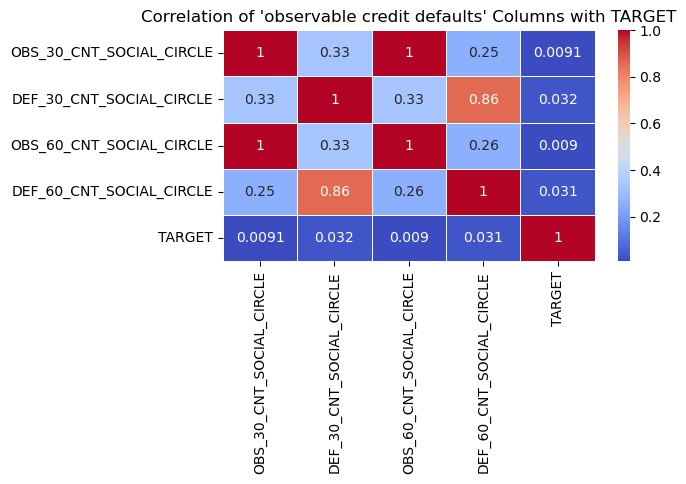

In [191]:

plt.figure(figsize=(6,3))
sns.heatmap(app[Observable_cr_default+["TARGET"]].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation of 'observable credit defaults' Columns with TARGET")
plt.show()

In [192]:
app=app.drop(columns=Observable_cr_default,axis=1)

In [193]:
app.shape

(307511, 41)

`WEEKDAY_APPR_PROCESS_START` → Day of the week might not have significant impact.
`HOUR_APPR_PROCESS_START` → The hour of application is unlikely to affect credit risk significantly.
`LIVE_CITY_NOT_WORK_CITY` → Redundant with REG_CITY_NOT_WORK_CITY.
`REG_REGION_NOT_LIVE_REGION`,` REG_REGION_NOT_WORK_REGION`, `LIVE_REGION_NOT_WORK_REGION` → These regional mismatch indicators may not add significant value.

In [195]:
drop_columns = [
    'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 
    'LIVE_CITY_NOT_WORK_CITY', 'REG_REGION_NOT_LIVE_REGION', 
    'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION'
]

# Drop the columns
app.drop(columns=drop_columns, inplace=True)


## Missing Imputation

In [197]:
app.isna().mean().sort_values()*100

SK_ID_CURR                      0.000000
ORGANIZATION_TYPE               0.000000
REG_CITY_NOT_WORK_CITY          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
REGION_RATING_CLIENT            0.000000
DAYS_ID_PUBLISH                 0.000000
DAYS_EMPLOYED                   0.000000
DAYS_BIRTH                      0.000000
REGION_POPULATION_RELATIVE      0.000000
NAME_HOUSING_TYPE               0.000000
NAME_FAMILY_STATUS              0.000000
DAYS_REGISTRATION               0.000000
NAME_INCOME_TYPE                0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
NAME_EDUCATION_TYPE             0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
CODE_GENDER                     0.000000
AMT_CREDIT                      0.000000
DAYS_LAST_PHONE_CHANGE          0.000325
CNT_FAM_MEMBERS                 0.000650
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE 

| Column Name                  | Missing %  | Suggested Imputation                          |
|------------------------------|------------|----------------------------------------------|
| `DAYS_LAST_PHONE_CHANGE`     | 0.0003%    | No action needed (very low missing rate)    |
| `CNT_FAM_MEMBERS`            | 0.0006%    | Mode (most frequent value)                  |
| `AMT_ANNUITY`                | 0.39%      | Median (avoids skewed data)                 |
| `AMT_GOODS_PRICE`            | 9.04%      | Median (since it's a financial amount)      |
| `EXT_SOURCE_2`               | 21.46%     | Median (it's a continuous score)            |
| `NAME_TYPE_SUITE`            | 42.01%     | Mode (categorical feature)                  |
| `AMT_REQ_CREDIT_BUREAU_*`    | 13.5%      | Fill with 0 (assuming missing means no inquiry made) |
| `EXT_SOURCE_3`               | 19.82%     | Median (same as EXT_SOURCE_2)               |
| `OCCUPATION_TYPE`            | 31.34%     | Mode (categorical)                          |


In [199]:
num_cols_median = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
app[num_cols_median].describe()

,AMT_ANNUITY,AMT_GOODS_PRICE,EXT_SOURCE_2,EXT_SOURCE_3
count,307499.000000,3.072330e+05,3.068510e+05,246546.000000
mean,27108.573909,5.383962e+05,5.143927e-01,0.510853
std,14493.737315,3.694465e+05,1.910602e-01,0.194844
min,1615.500000,4.050000e+04,8.173617e-08,0.000527
25%,16524.000000,2.385000e+05,3.924574e-01,0.370650
50%,24903.000000,4.500000e+05,5.659614e-01,0.535276
75%,34596.000000,6.795000e+05,6.636171e-01,0.669057
max,258025.500000,4.050000e+06,8.549997e-01,0.896010


In [200]:
# Mode (Most Frequent Value) for categorical data
app['CNT_FAM_MEMBERS'].fillna(app['CNT_FAM_MEMBERS'].mode()[0], inplace=True)
app['NAME_TYPE_SUITE'].fillna(app['NAME_TYPE_SUITE'].mode()[0], inplace=True)
app['OCCUPATION_TYPE'].fillna(app['OCCUPATION_TYPE'].mode()[0], inplace=True)

# Median for continuous numerical data
num_cols_median = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
for col in num_cols_median:
    app[col].fillna(app[col].median(), inplace=True)

# Fill AMT_REQ_CREDIT_BUREAU_* columns with 0
credit_bureau_cols = [
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
    'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'
]
app[credit_bureau_cols] = app[credit_bureau_cols].fillna(0)


In [201]:
# Median for continuous numerical data
app['DAYS_LAST_PHONE_CHANGE'].fillna(app['DAYS_LAST_PHONE_CHANGE'].median(), inplace=True)


In [202]:
app.isna().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
ORGANIZATION_TYPE              0
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
DAYS_LAST_PHONE_CHANGE         0
AMT_REQ_CREDIT_BUREAU_HOUR     0
AMT_REQ_CR

In [203]:
#we find colums with negative values in DAYS_ columns
neg_cols = [col for col in app.select_dtypes(include=[np.number]).columns if (app[col] < 0).any()]
neg_cols


['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [204]:
for col in neg_cols:
    app[col]=abs(app[col])

In [205]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307511 non-null  float64
 8   AMT_GOODS_PRICE              307511 non-null  float64
 9   NAME_TYPE_SUITE              307511 non-null  object 
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

In [206]:
numeric_col = [col for col in app.select_dtypes(include=[np.number]).columns]
unique_counts = app[numeric_col].nunique().sort_values()
print(unique_counts)


TARGET                              2
REG_CITY_NOT_WORK_CITY              2
REG_CITY_NOT_LIVE_CITY              2
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
AMT_REQ_CREDIT_BUREAU_HOUR          5
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
AMT_REQ_CREDIT_BUREAU_MON          24
AMT_REQ_CREDIT_BUREAU_YEAR         25
REGION_POPULATION_RELATIVE         81
EXT_SOURCE_3                      814
AMT_GOODS_PRICE                  1002
AMT_INCOME_TOTAL                 2548
DAYS_LAST_PHONE_CHANGE           3773
AMT_CREDIT                       5603
DAYS_ID_PUBLISH                  6168
DAYS_EMPLOYED                   12574
AMT_ANNUITY                     13672
DAYS_REGISTRATION               15688
DAYS_BIRTH                      17460
EXT_SOURCE_2                   119831
SK_ID_CURR                     307511
dtype: int64

In [207]:
#To check the values in categorical columns
# Select categorical columns
categorical_cols = app.select_dtypes(include=['object']).columns

# Create a pivot table with value counts for each categorical column
pivot_tables = {col: app[col].value_counts().reset_index() for col in categorical_cols}

# Display pivot tables
for col, df in pivot_tables.items():
    print(f"Pivot Table for {col}:\n")
    print(df)
    print("\n" + "="*50 + "\n")


Pivot Table for NAME_CONTRACT_TYPE:

  NAME_CONTRACT_TYPE   count
0         Cash loans  278232
1    Revolving loans   29279


Pivot Table for CODE_GENDER:

  CODE_GENDER   count
0           F  202448
1           M  105059
2         XNA       4


Pivot Table for NAME_TYPE_SUITE:

   NAME_TYPE_SUITE   count
0    Unaccompanied  249818
1           Family   40149
2  Spouse, partner   11370
3         Children    3267
4          Other_B    1770
5          Other_A     866
6  Group of people     271


Pivot Table for NAME_INCOME_TYPE:

       NAME_INCOME_TYPE   count
0               Working  158774
1  Commercial associate   71617
2             Pensioner   55362
3         State servant   21703
4            Unemployed      22
5               Student      18
6           Businessman      10
7       Maternity leave       5


Pivot Table for NAME_EDUCATION_TYPE:

             NAME_EDUCATION_TYPE   count
0  Secondary / secondary special  218391
1               Higher education   74863
2              I

In [208]:
# we can observe that ORGANIZATION_TYPE   and CODE_GENDER has value XNA which can be null value 
#In ORGANIZATION_TYPE it can be null value or Unorganised sector which is in comparable numbers, so keeping it as it is.
#CODE_GENDER has three values F,M,XNA F,M can be interpreted as male and female.
#XNA can be interpreted either null value or third gender. Since XNA % is very small it can be imputed with mode
mode_gender = app['CODE_GENDER'].mode()[0]
app['CODE_GENDER'].replace('XNA', mode_gender, inplace=True)
app['CODE_GENDER'].value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

## Univariate Analysis

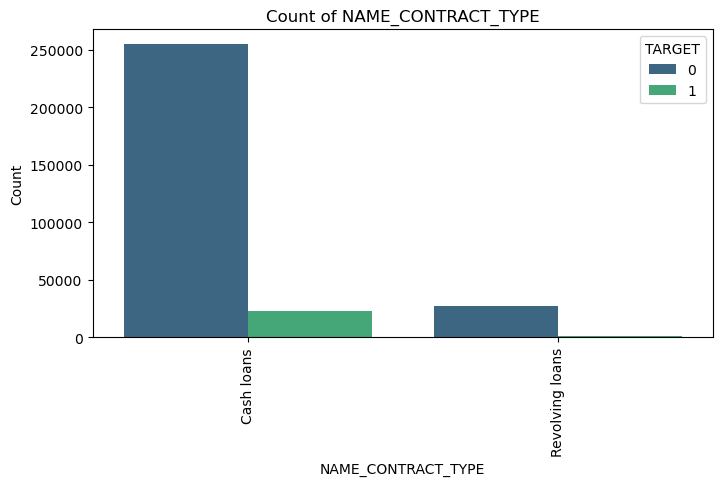

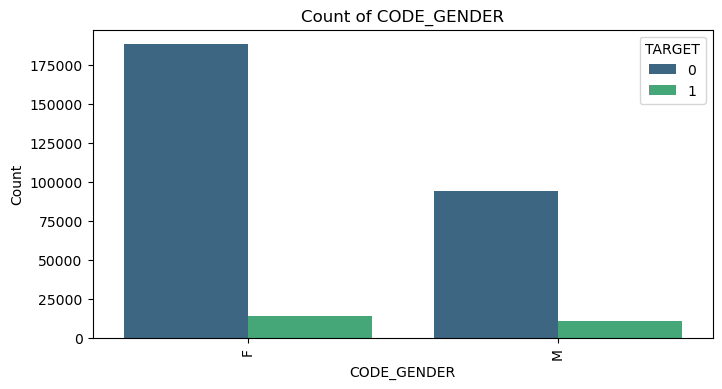

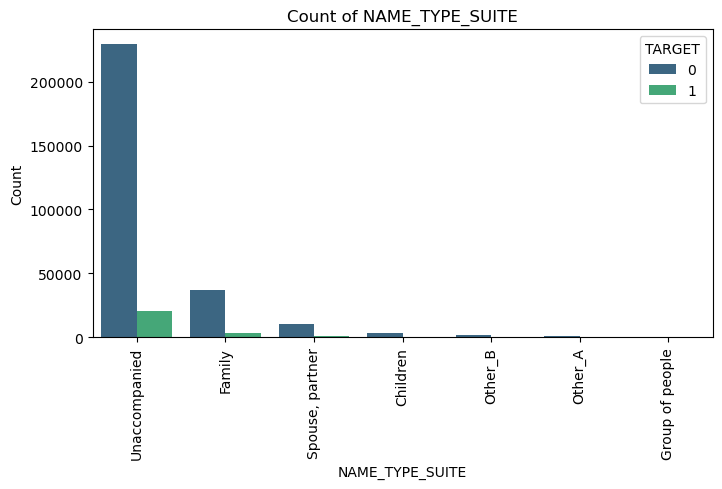

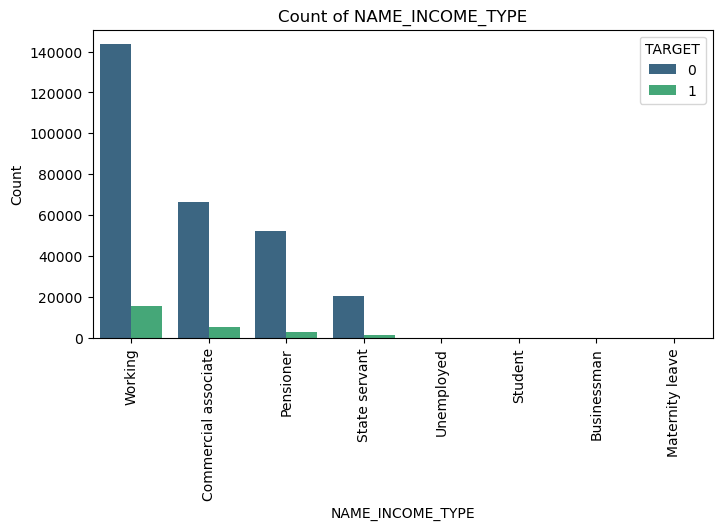

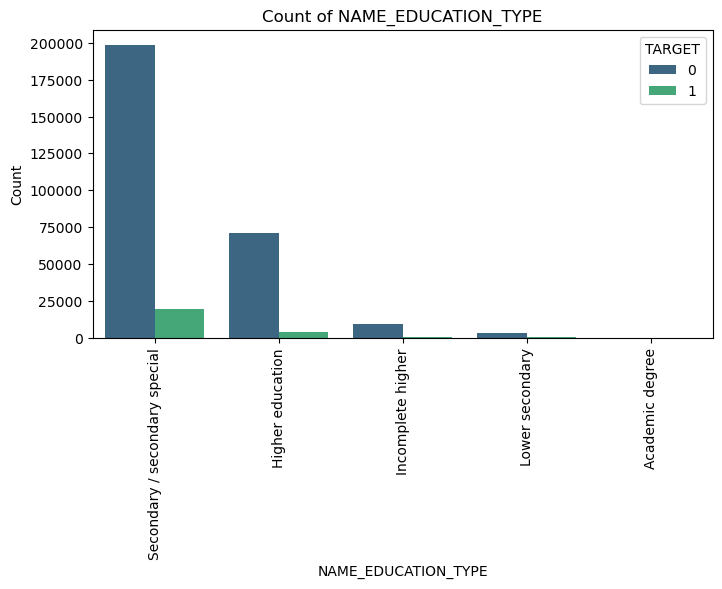

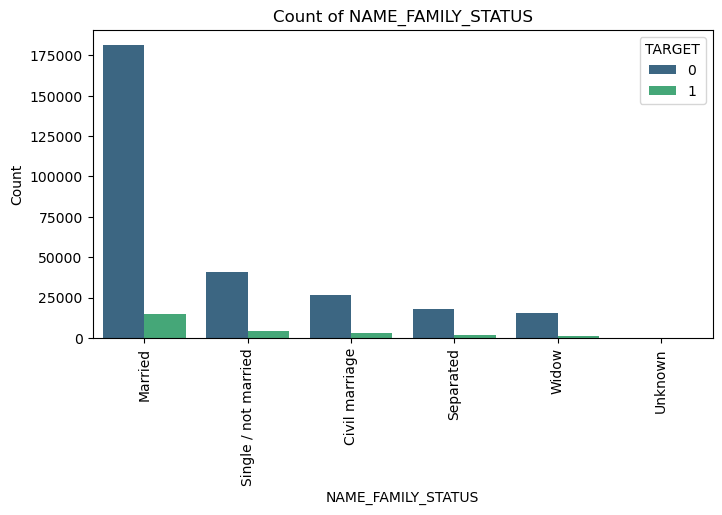

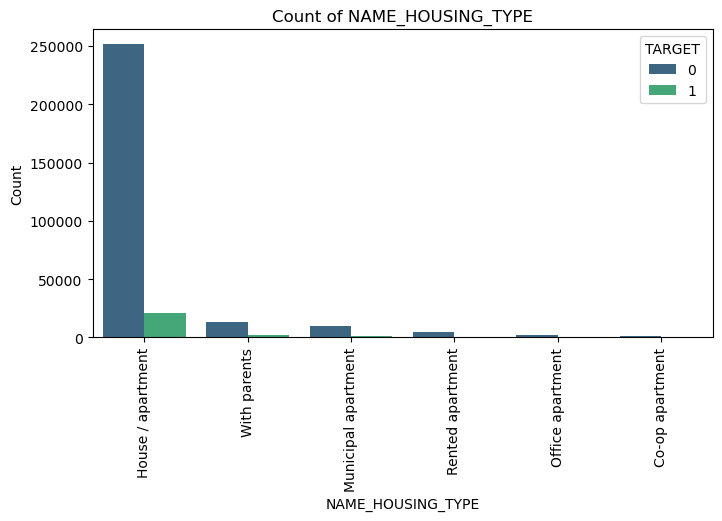

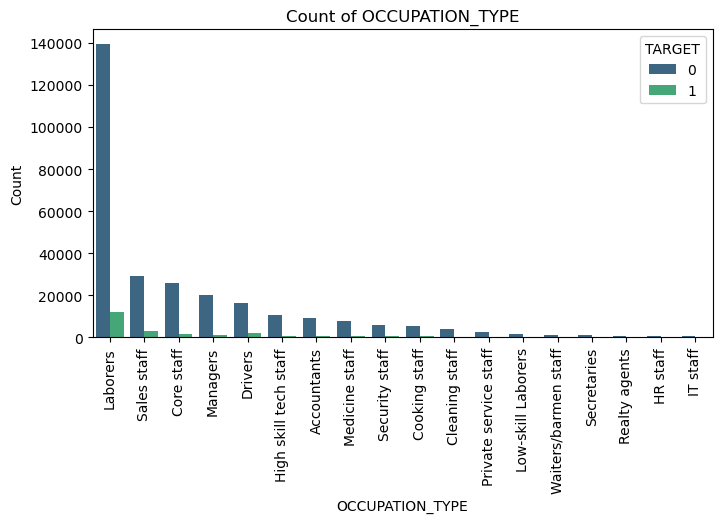

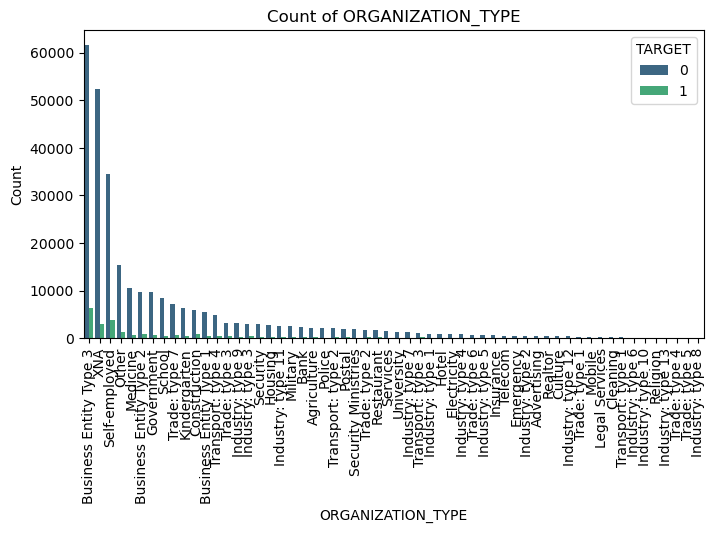

In [210]:
## **Univariate Analysis for Categorical Variables with respect to target variable distribution** ##
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=app[col], hue=app['TARGET'],order=app[col].value_counts().index, palette='viridis')
    plt.xticks(rotation=90)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

**observations**
`NAME_CONTRACT_TYPE`
"Cash loans" is dominant, it indicates a preference among applicants.

`CODE_GENDER`
Females applied more loan

`NAME_TYPE_SUITE`
"Unaccompanied" is the most frequent category, it suggests most applicants apply alone.

`NAME_INCOME_TYPE`
 "Working" is the largest group, most applicants are employed.
A significant "Pensioner" group suggests older individuals also seek loans.

`NAME_EDUCATION_TYPE`

If "Secondary / secondary special" is the most common, it shows that higher education is not a strict requirement.
If "Higher education" has a notable presence, it indicates well-educated applicants.

`NAME_FAMILY_STATUS`
A higher count for "Married" suggests that married individuals are more likely to apply for loans.

`NAME_HOUSING_TYPE`

 "House / apartment" is the most common, most applicants have stable housing.
A high "Rented apartment" count could indicate financial instability.
`OCCUPATION_TYPE`
The dominant occupation type provides insights into the working class applying for loans.
"Laborers" or "Sales staff" are high, it suggests blue-collar workers frequently apply.
`ORGANIZATION_TYPE`

 "Business Entity Type 3" or "Self-employed" is frequent, small business owners apply more.


**Numerical columns with binary categorical values**

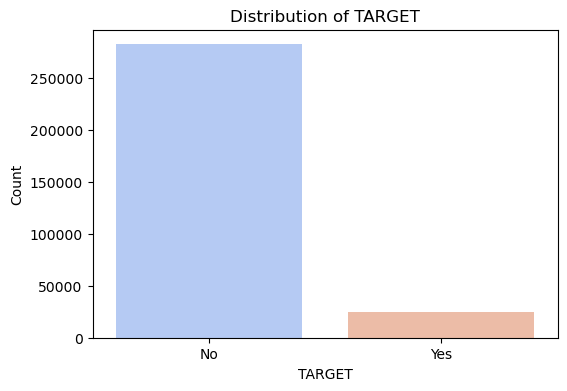

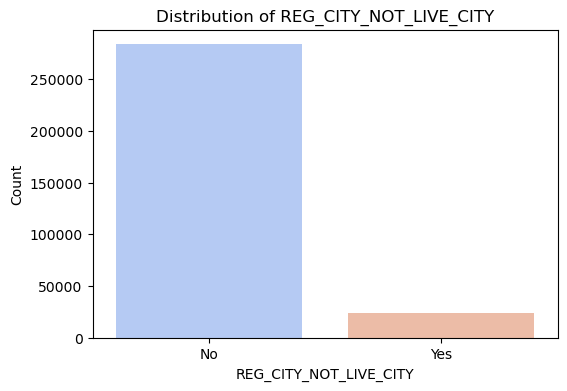

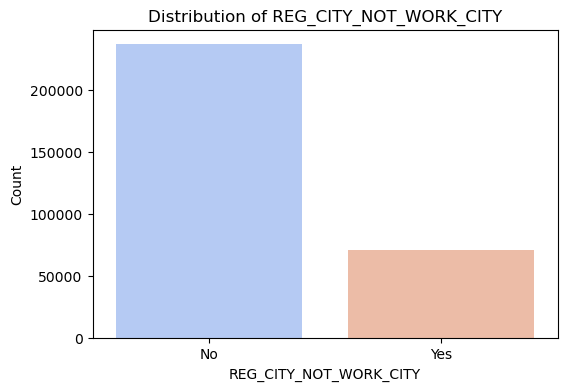

In [213]:
# Identify binary columns (values only 0 and 1)
binary_cols = [col for col in app.columns if app[col].nunique() == 2 and set(app[col].dropna().unique()) == {0, 1}]

# Plot countplots for binary columns
for col in binary_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=app[col], palette='coolwarm')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
    plt.show()

**Observation**
`TARGET` variable has very high percentage of non_defaulters.
The registered city is not the city where the applicant lives and work for majority.

## Outliers

Numerical Continous data which can have outlers

AMT_INCOME_TOTAL (Income)

AMT_CREDIT (Credit Amount)

AMT_ANNUITY (Loan Annuity)

AMT_GOODS_PRICE (requested loan amount)
DAYS_EMPLOYED 

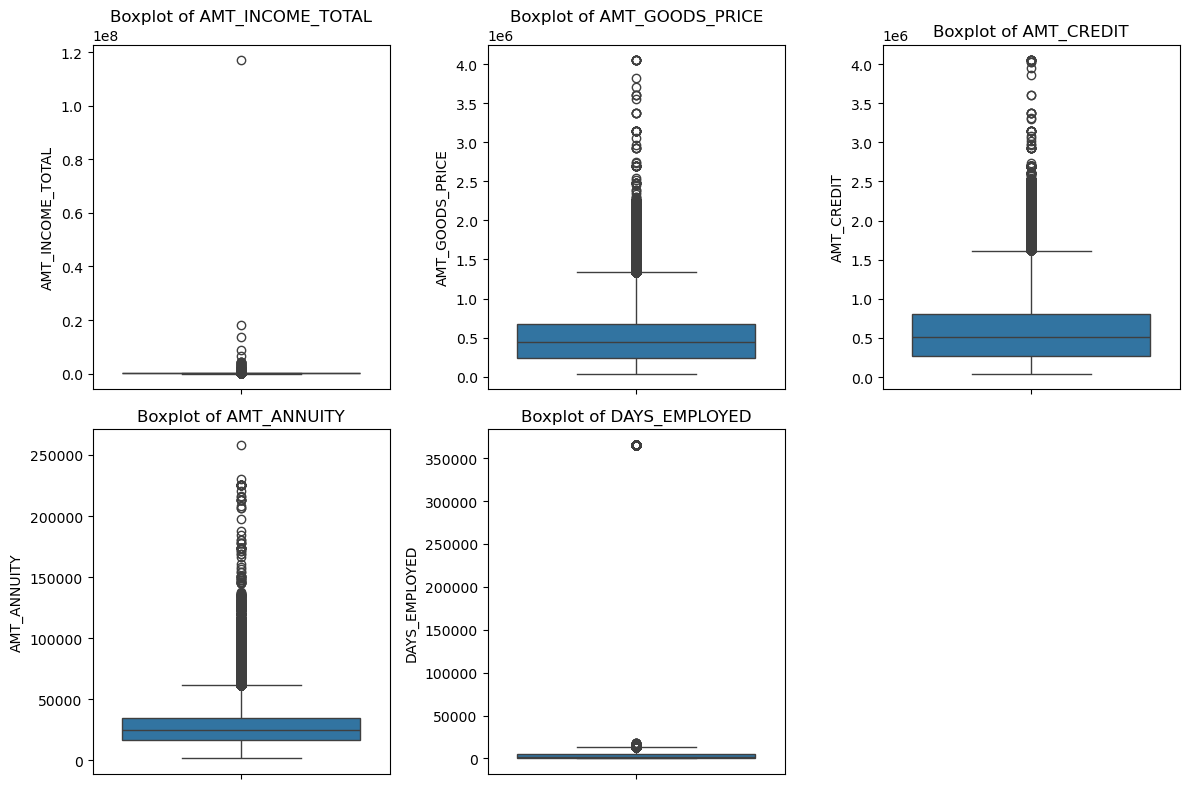

In [217]:
num=["AMT_INCOME_TOTAL","AMT_GOODS_PRICE","AMT_CREDIT","AMT_ANNUITY","DAYS_EMPLOYED"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(num, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=app[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

In [218]:
#Describe to check summary and identify outliers by percentiles

In [219]:
print(app[num].describe())
app[num].quantile([0,.10,.20,.30,.40,.50,.60,.70,.80,.90,.99])

       AMT_INCOME_TOTAL  AMT_GOODS_PRICE    AMT_CREDIT    AMT_ANNUITY  \
count      3.075110e+05     3.075110e+05  3.075110e+05  307511.000000   
mean       1.687979e+05     5.383163e+05  5.990260e+05   27108.487841   
std        2.371231e+05     3.692890e+05  4.024908e+05   14493.461065   
min        2.565000e+04     4.050000e+04  4.500000e+04    1615.500000   
25%        1.125000e+05     2.385000e+05  2.700000e+05   16524.000000   
50%        1.471500e+05     4.500000e+05  5.135310e+05   24903.000000   
75%        2.025000e+05     6.795000e+05  8.086500e+05   34596.000000   
max        1.170000e+08     4.050000e+06  4.050000e+06  258025.500000   

       DAYS_EMPLOYED  
count  307511.000000  
mean    67724.742149  
std    139443.751806  
min         0.000000  
25%       933.000000  
50%      2219.000000  
75%      5707.000000  
max    365243.000000  


,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_CREDIT,AMT_ANNUITY,DAYS_EMPLOYED
0.00,25650.0,40500.0,45000.0,1615.5,0.0
0.10,81000.0,180000.0,180000.0,11074.5,392.0
0.20,99000.0,225000.0,254700.0,14701.5,749.0
0.30,112500.0,270000.0,306306.0,18189.0,1132.0
0.40,135000.0,378000.0,432000.0,21870.0,1597.0
0.50,147150.0,450000.0,513531.0,24903.0,2219.0
0.60,162000.0,522000.0,604152.0,28062.0,3032.0
0.70,180000.0,675000.0,755190.0,32004.0,4435.0
0.80,225000.0,814500.0,900000.0,37516.5,9188.0
0.90,270000.0,1093500.0,1133748.0,45954.0,365243.0


**Identifying Outliers Using Percentiles**
- The **90th percentile** is significantly higher than the **50th percentile (median)** for all financial variables, indicating **a right-skewed distribution**.
- The **99th percentile** shows extreme jumps in values, confirming the presence of **outliers**.

**Specific Observations**
| Feature | 50th Percentile (Median) | 90th Percentile | 99th Percentile | Outlier Trend |
|---------|--------------------------|----------------|----------------|---------------|
| **AMT_INCOME_TOTAL** | 147,150 | 270,000 | 472,500 | **Right-skewed, high earners in 99th percentile** |
| **AMT_GOODS_PRICE** | 450,000 | 1,093,500 | 1,800,000 | **Significant jump in high-value purchases** |
| **AMT_CREDIT** | 513,531 | 1,133,748 | 1,854,000 | **Extreme credit values observed** |
| **AMT_ANNUITY** | 24,903 | 45,954 | 70,006 | **High variance in annuity payments** |
| **DAYS_EMPLOYED** | 2,219 | 365,243 | 365,243 | **Extreme values detected (365,243 days ≈ 1000 years!)** |

To deal with outliers, we can cap the Outliers with IQR

In [221]:
def cap_outliers_iqr(df, columns):
    df_capped = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)  # 25th percentile (Q1)
        Q3 = df[col].quantile(0.75)  # 75th percentile (Q3)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_capped[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df_capped[col] = np.where(df_capped[col] > upper_bound, upper_bound, df_capped[col])
    return df_capped

In [222]:
app_df_capped = cap_outliers_iqr(app, num)


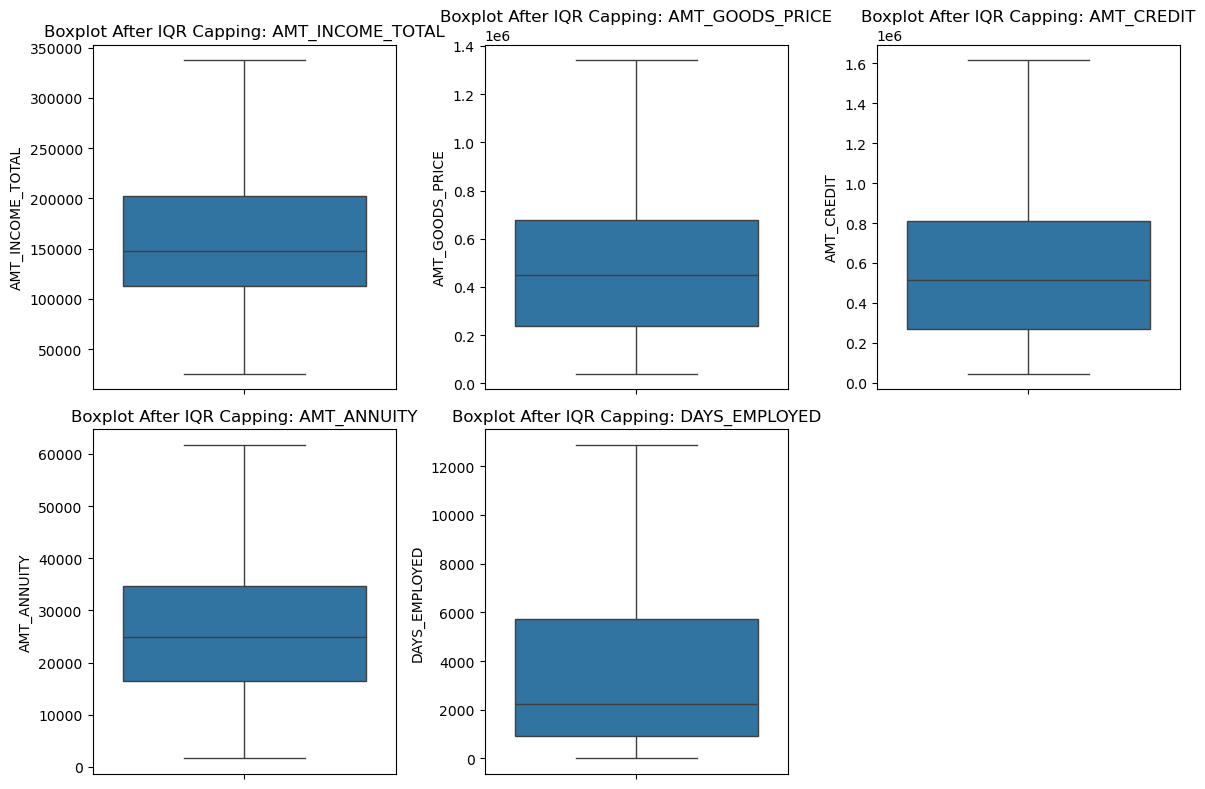

In [223]:
# Plot boxplots after IQR-based capping
plt.figure(figsize=(12, 8))
for i, col in enumerate(num, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=app_df_capped[col],)
    plt.title(f"Boxplot After IQR Capping: {col}")

plt.tight_layout()
plt.show()


In [224]:
app_df_capped.shape


(307511, 35)

Assuming that project requirment  is to [Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier. Again, remember that for this exercise, it is not necessary to remove any data points.] continue to use original dataframe instaed of capped one

#### Creating bins to check the variation of data group relationship with target

In [227]:
#create a new feature age from DAYS_BIRTH to check how age group is distributed
app["age"]=app["DAYS_BIRTH"]//365

In [228]:
#Binning age into group
bins = [0,20,30,40,50,60,100]
labels = ['Below 20','20-30','30-40','40-50','50-60','Above 60']
app['AGE_GROUP'] = pd.cut(app["age"], bins = bins, labels = labels )

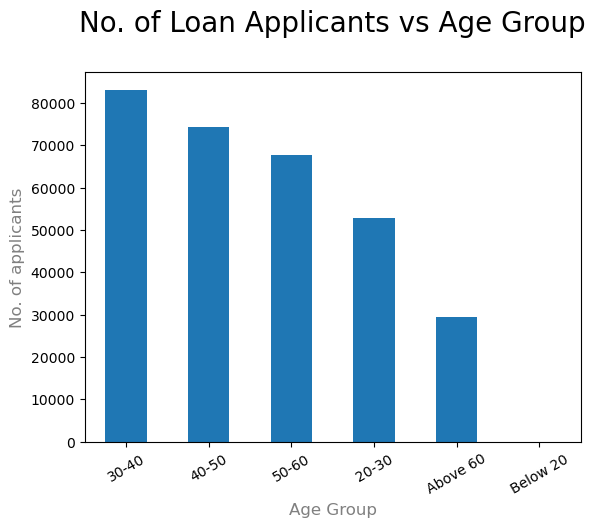

In [229]:
#Visualising age distribution
app['AGE_GROUP'].value_counts().plot(kind='bar')
plt.title("No. of Loan Applicants vs Age Group\n", fontdict={'fontsize': 20, 'fontweight' : 5})
plt.ylabel('No. of applicants', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Grey'})
plt.xlabel('Age Group', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Grey'})
plt.xticks(rotation=30)
plt.show()

Maximum no. of loan applications are from age group 30-40, almost no applications below 20 age group (which is understandable as this group has very less chance of having an income).
Let's also bin the AMT_INCOME_TOTAL to categorize the total income of the applicants.

In [231]:
#create a bin for AMT_INCOME_TOTAL,	AMT_GOODS_PRICE	,AMT_CREDIT	,AMT_ANNUITY and visualise it

In [232]:
col=["AMT_INCOME_TOTAL","AMT_GOODS_PRICE","AMT_CREDIT","AMT_ANNUITY"]
# For Better readability convert these column to lakh
app[col]=app[col]/100000
app[col].describe()

,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,AMT_CREDIT,AMT_ANNUITY
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,1.687979,5.383163,5.990260,0.271085
std,2.371231,3.692890,4.024908,0.144935
min,0.256500,0.405000,0.450000,0.016155
25%,1.125000,2.385000,2.700000,0.165240
50%,1.471500,4.500000,5.135310,0.249030
75%,2.025000,6.795000,8.086500,0.345960
max,1170.000000,40.500000,40.500000,2.580255


In [233]:
# Binning based on above summary

bins = [0,1,2,5,10,20,50,1000]
labels = ['Upto 1L','1-2L','2-5L','5-10L','10-20L','20-50L','50L above']

In [234]:
app["AMT_INCOME_TOTAL_RANGE"]=pd.cut(app["AMT_INCOME_TOTAL"],bins=bins,labels=labels)

app["AMT_GOODS_PRICE_RANGE"]=pd.cut(app["AMT_GOODS_PRICE"],bins=bins,labels=labels)
app["AMT_CREDIT_RANGE"]=pd.cut(app["AMT_CREDIT"],bins=bins,labels=labels)
app["AMT_ANNUITY_RANGE"]=pd.cut(app["AMT_ANNUITY"],bins=bins,labels=labels)

In [235]:
col_range=["AMT_INCOME_TOTAL_RANGE","AMT_GOODS_PRICE_RANGE","AMT_CREDIT_RANGE","AMT_ANNUITY_RANGE"]

app[col_range].head()

,AMT_INCOME_TOTAL_RANGE,AMT_GOODS_PRICE_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE
0,2-5L,2-5L,2-5L,Upto 1L
1,2-5L,10-20L,10-20L,Upto 1L
2,Upto 1L,1-2L,1-2L,Upto 1L
3,1-2L,2-5L,2-5L,Upto 1L
4,1-2L,5-10L,5-10L,Upto 1L


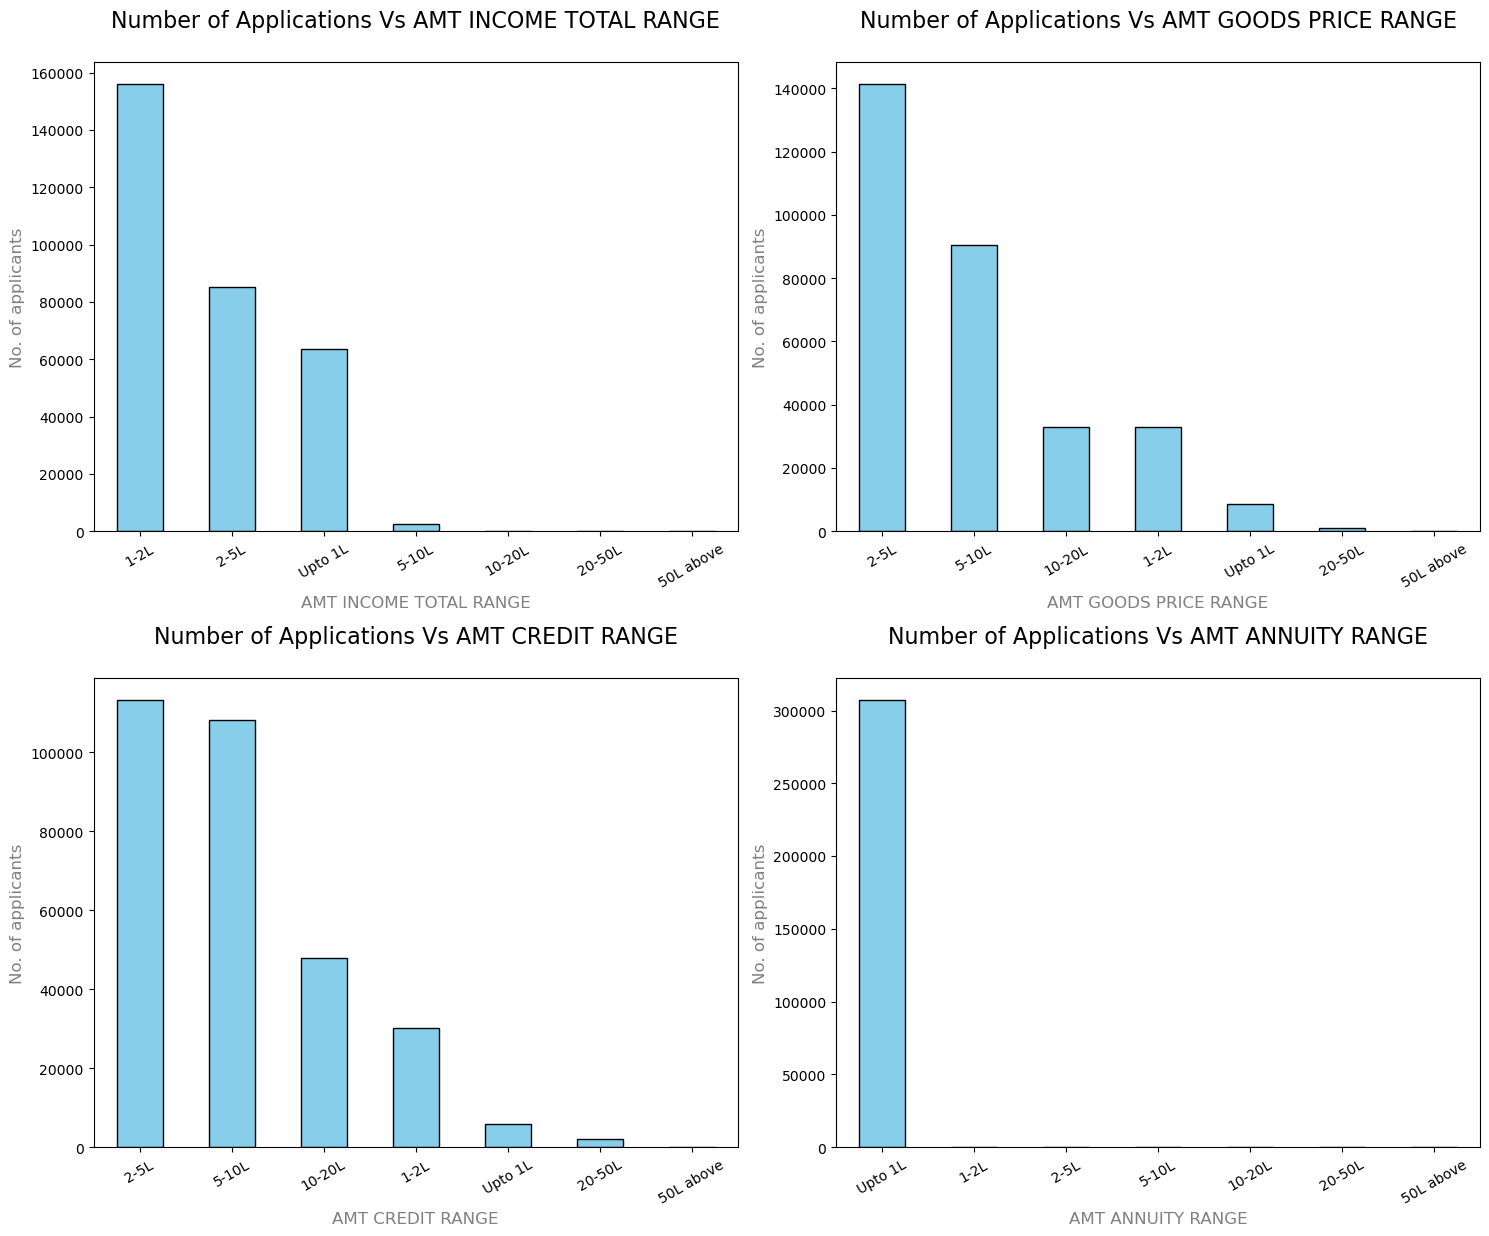

In [236]:
plt.figure(figsize=(15, 6 * len(col_range)))

# Loop through each categorical bin column
for i, col in enumerate(col_range, 1):
    plt.subplot(len(col_range), 2, i)
    app[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    
    plt.title(f"Number of Applications Vs {col.replace('_', ' ')}\n", 
              fontdict={'fontsize': 16, 'fontweight': 5})
    
    plt.ylabel('No. of applicants', fontdict={'fontsize': 12, 'fontweight': 5, 'color': 'Grey'})
    plt.xlabel(col.replace("_", " "), fontdict={'fontsize': 12, 'fontweight': 5, 'color': 'Grey'})
    
    plt.xticks(rotation=30)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

* Majority of applicants have low to middle income (1-5L range).
* Most loans are for moderate amounts (2-10L), with few high-value loans.
* Borrowers prefer smaller, manageable installments (upto 1L annuity).
* Low demand for high-value loans suggests mid-tier credit needs.

# Data Imbalance

In [239]:
# To check the Imbalance to data in percentage
per=app['TARGET'].value_counts(normalize=True) * 100


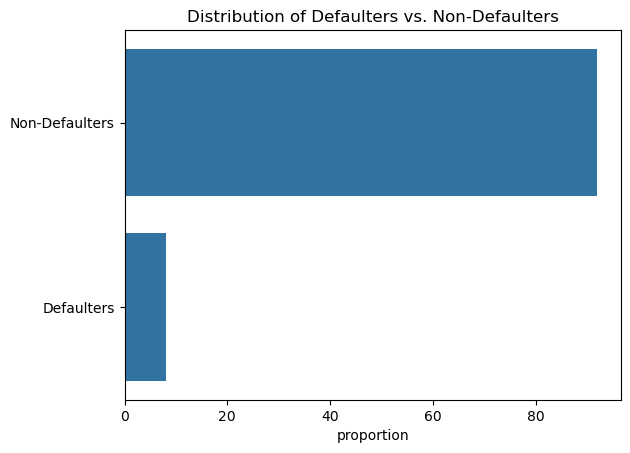

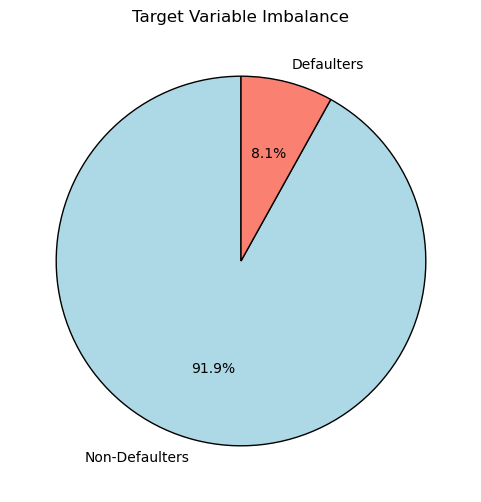

In [240]:
sns.barplot(x=per,y=["Non-Defaulters","Defaulters"])
plt.title('Distribution of Defaulters vs. Non-Defaulters')
plt.show()
labels = ['Non-Defaulters', 'Defaulters']  # Adjust based on your dataset

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(per, labels=labels, autopct='%1.1f%%', colors=['lightblue', 'salmon'], startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title('Target Variable Imbalance')
plt.show()

**Observation:**

Only 8% of the `TARGET` is defaulter. so the datais very imbalanced.

In [242]:
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,...,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979,5.990260,0.271085,5.383163,0.020868,16036.995067,67724.742149,...,5.145034e-01,0.515695,962.858119,0.005538,0.006055,0.029723,0.231293,0.229631,1.643447,43.435968
std,102790.175348,0.272419,0.722121,2.371231,4.024908,0.144935,3.692890,0.013831,4363.988632,139443.751806,...,1.908699e-01,0.174736,826.807226,0.078014,0.103037,0.190728,0.856810,0.744059,1.855821,11.954593
min,100002.000000,0.000000,0.000000,0.256500,0.450000,0.016155,0.405000,0.000290,7489.000000,0.000000,...,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,189145.500000,0.000000,0.000000,1.125000,2.700000,0.165240,2.385000,0.010006,12413.000000,933.000000,...,3.929737e-01,0.417100,274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000
50%,278202.000000,0.000000,0.000000,1.471500,5.135310,0.249030,4.500000,0.018850,15750.000000,2219.000000,...,5.659614e-01,0.535276,757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.000000
75%,367142.500000,0.000000,1.000000,2.025000,8.086500,0.345960,6.795000,0.028663,19682.000000,5707.000000,...,6.634218e-01,0.636376,1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,53.000000
max,456255.000000,1.000000,19.000000,1170.000000,40.500000,2.580255,40.500000,0.072508,25229.000000,365243.000000,...,8.549997e-01,0.896010,4292.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000,69.000000


In [243]:
# Count of each class in TARGET variable
target_counts = app["TARGET"].value_counts()

# Compute imbalance ratio (Minority class / Majority class)
imbalance_ratio = target_counts.min() / target_counts.max()

print("Class Distribution:\n", target_counts)
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")  # Round to 2 decimal places


Class Distribution:
 TARGET
0    282686
1     24825
Name: count, dtype: int64
Imbalance Ratio: 0.09


In [244]:
# Create a DataFrame for non-defaulters (TARGET = 0)
non_defaulters = app[app["TARGET"] == 0]

# Create a DataFrame for defaulters (TARGET = 1)
defaulters = app[app["TARGET"] == 1]

# Print their shapes to confirm separation
print("Non-Defaulters Shape:", non_defaulters.shape)
print("Defaulters Shape:", defaulters.shape)


Non-Defaulters Shape: (282686, 41)
Defaulters Shape: (24825, 41)


**Visualising the categorical and continious variable with defaulters and non-defaulters**


In [246]:
categorical=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', ]

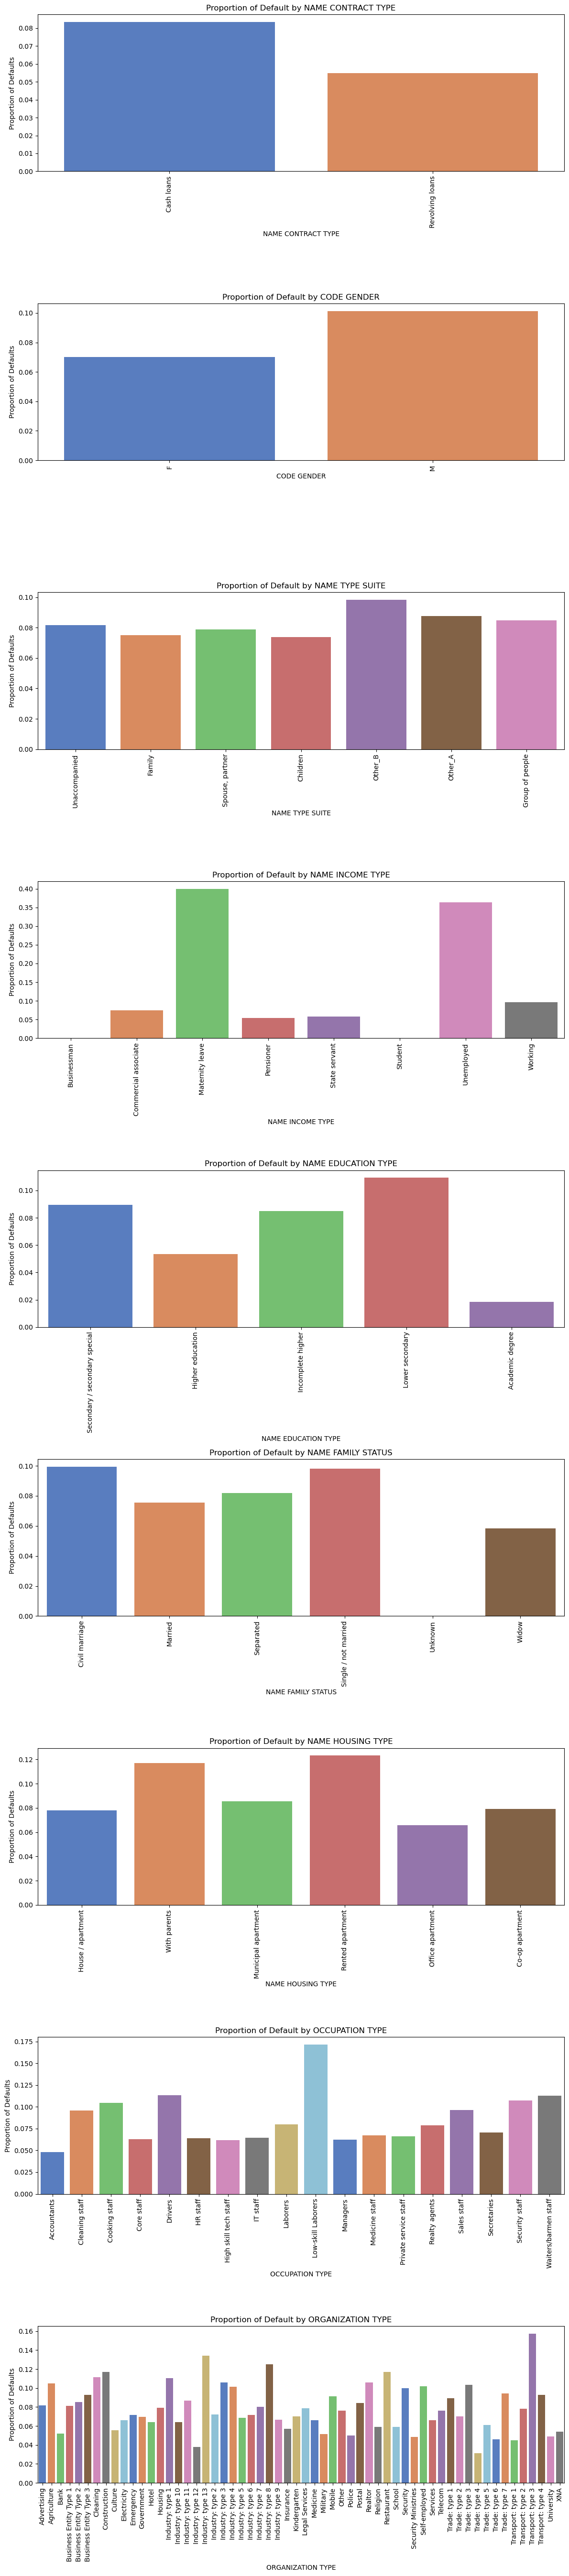

In [247]:
# Set figure size dynamically based on the number of subplots
plt.figure(figsize=(12, 6 * len(categorical)))

# Loop through each categorical variable
for i, col in enumerate(categorical, 1):
    plt.subplot(len(categorical), 1, i)

    # Calculate the proportion of defaulters for each category
    defaulter_counts = defaulters[col].value_counts()
    non_defaulter_counts = non_defaulters[col].value_counts()
    
    # Compute default rate (Defaulters / Total Applicants in that category)
    default_rate = defaulter_counts / (defaulter_counts + non_defaulter_counts)

    # Convert to DataFrame for plotting
    target = pd.DataFrame({col: default_rate.index, 'Default Rate': default_rate.values})

    # Plot bar chart
    ax = sns.barplot(x=col, y='Default Rate', palette="muted", data=target)
    ax.set_xlabel(col.replace('_', ' '))
    ax.set_ylabel('Proportion of Defaults')
    ax.set_title(f'Proportion of Default by {col.replace("_", " ")}')
    
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Business-Relevant Observations & Insights**

**1️ Loan Type & Default Risk**
- **Cash loans** have a significantly **higher default rate** than revolving loans.  
- **Business Impact:** Stricter approval criteria or higher interest rates for cash loans.

**2️ Gender & Default Trends**
- **Male applicants** have a higher **default rate** than females.  
- **Business Impact:** Refine gender-based **credit risk models** considering employment and financial history.

**3️ Maternity Leave & Default Risk**
- **Higher default ratio** among maternity leave applicants, likely due to temporary income reduction.  
- **Business Impact:** Consider **flexible repayment plans** for applicants on maternity leave.

**4️ Education & Marital Status**
- **Lower secondary education** and **civil marriage** applicants have **higher default rates**.  
- **Business Impact:** Implement **financial literacy programs** and improve credit scoring for these segments.

**5️ Housing & Default Probability**
- **Renters** default more than homeowners, indicating lower financial stability.  
- **Business Impact:** Additional **credit checks** or **customized financial products** for renters.

**6️ Occupation & Risk Exposure**
- **Low-skilled laborers** show high default rates due to income instability.  
- **Business Impact:** **Employment history evaluation** and secured loan options for this group.

**7️ Organization Type & Default Rates**
- **Transport Type 3 employees** have **higher defaults**, possibly due to fluctuating income.  
- **Business Impact:** Introduce **income verification policies** and **custom repayment plans**.



#### Univariate analysis on continuous columns

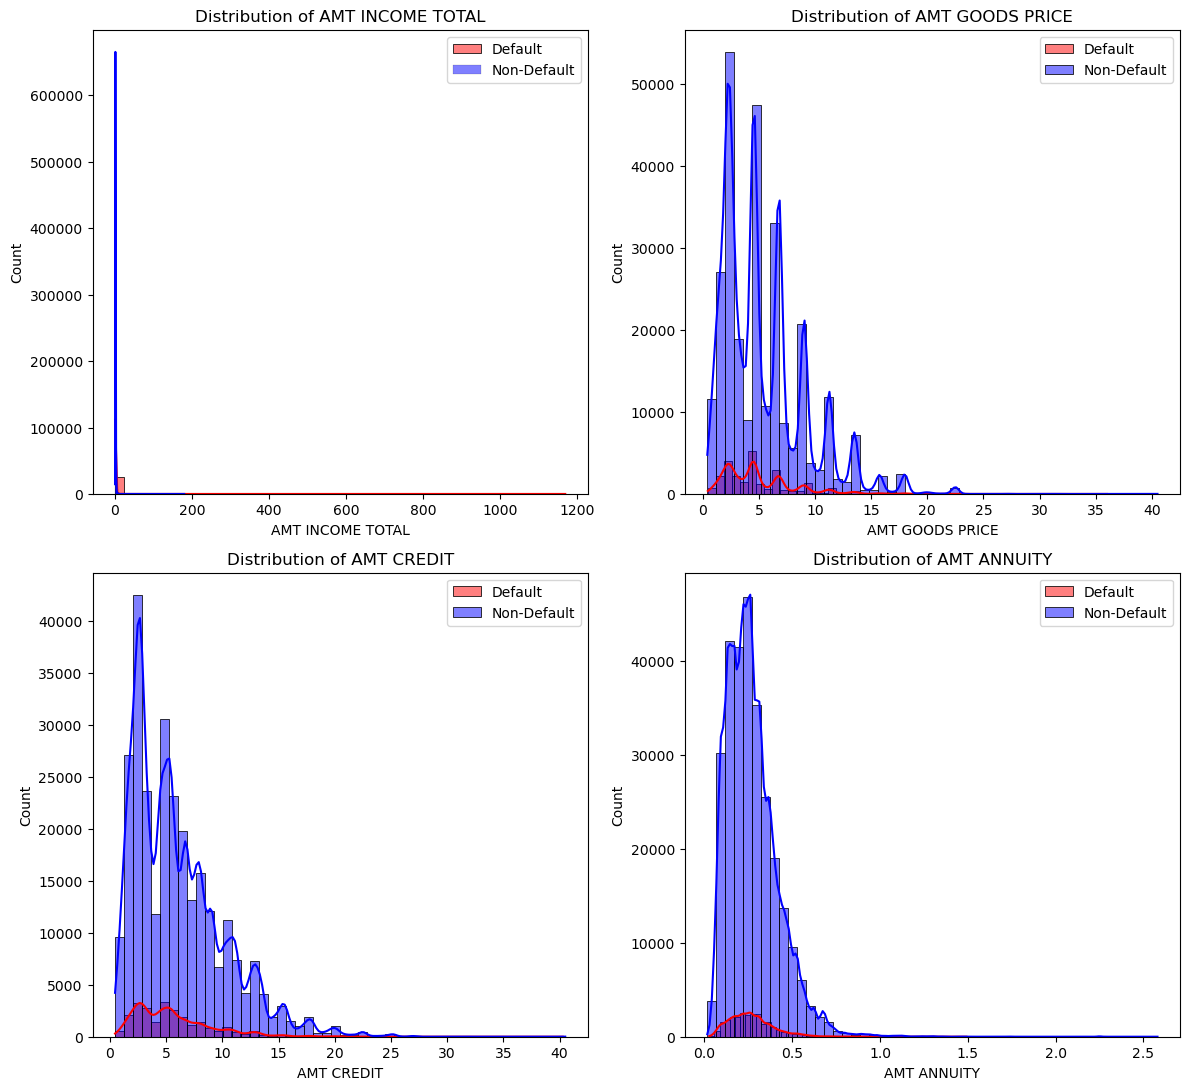

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define continuous numerical columns for analysis
cont_cols = ["AMT_INCOME_TOTAL", "AMT_GOODS_PRICE", "AMT_CREDIT", "AMT_ANNUITY"]

# Set figure size dynamically based on the number of subplots
plt.figure(figsize=(12, 4 * len(cont_cols)))

# Loop through each continuous variable
for i, col in enumerate(cont_cols, 1):
    plt.subplot(3,2, i)

    # Histplot with KDE for defaulters vs. non-defaulters
    sns.histplot(defaulters[col], label="Default", kde=True, color="red", bins=50, alpha=0.5)
    sns.histplot(non_defaulters[col], label="Non-Default", kde=True, color="blue", bins=50, alpha=0.5)
    
    plt.title(f'Distribution of {col.replace("_", " ")}')
    plt.xlabel(col.replace("_", " "))
    plt.ylabel('Count')
    plt.legend()

plt.tight_layout()
plt.show()


Observations:
* Non defaulters have higher income than defaulters.75000 to 200000 income has some spikes and then higher the income, the lesser spike we can see for default people.
* the lesser loan credit amount, the higher the default chances
* The loan annuty is mostly concentrated within 10000 to 40000 range in both the cases.
* low annity has high defaulters


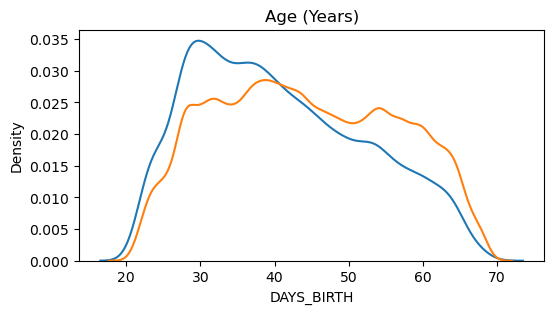

In [252]:
#Age distribution for defaulter vs non-defaulter
plt.figure(figsize = (6,3))

sns.kdeplot(defaulters['DAYS_BIRTH']/365, label = 'default')
sns.kdeplot(non_defaulters['DAYS_BIRTH']/365, label = 'non-default')
plt.title(r'Age (Years)')
plt.show()

Around 29 years to 40 years people are more defaulters. There is high chance to be defaulted of the young people. Non-defaulted people are almost equally distributed

## Bivariate Analysis

Numerical vs. Target (TARGET) → Boxplots/Violin plots

Categorical vs. Target (TARGET) → Bar plots/Stacked bar plots

Numerical vs. Numerical → Scatter plots/Correlation heatmaps

Segmented Analysis → Mean/median comparisons for defaulters vs. non-defaulters

**Key Question: Do financial variables differ significantly between defaulters and non-defaulters?**

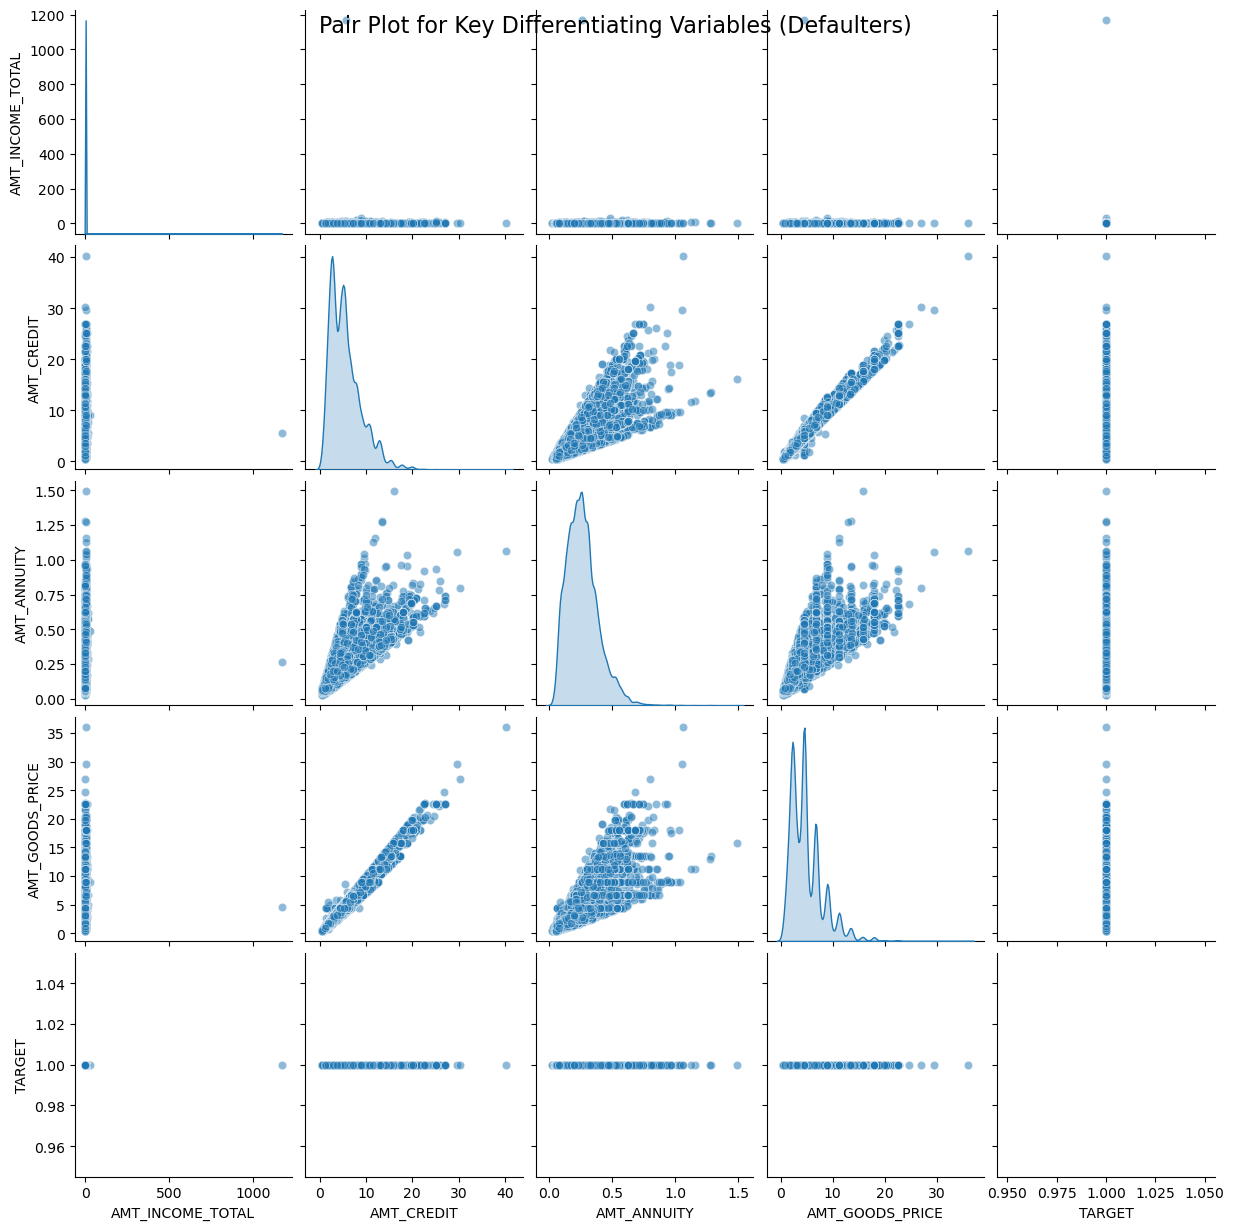

In [257]:
# To check the continous variable relationship plot pairplot
# Select key numerical columns for pair plot
selected_features = ["AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",]

# Ensure TARGET is included for visualization
selected_features = selected_features + ["TARGET"]

# Pair plot for defaulters
sns.pairplot(defaulters[selected_features], diag_kind="kde", plot_kws={'alpha': 0.5}, )
plt.suptitle("Pair Plot for Key Differentiating Variables (Defaulters)", fontsize=16)
plt.show()

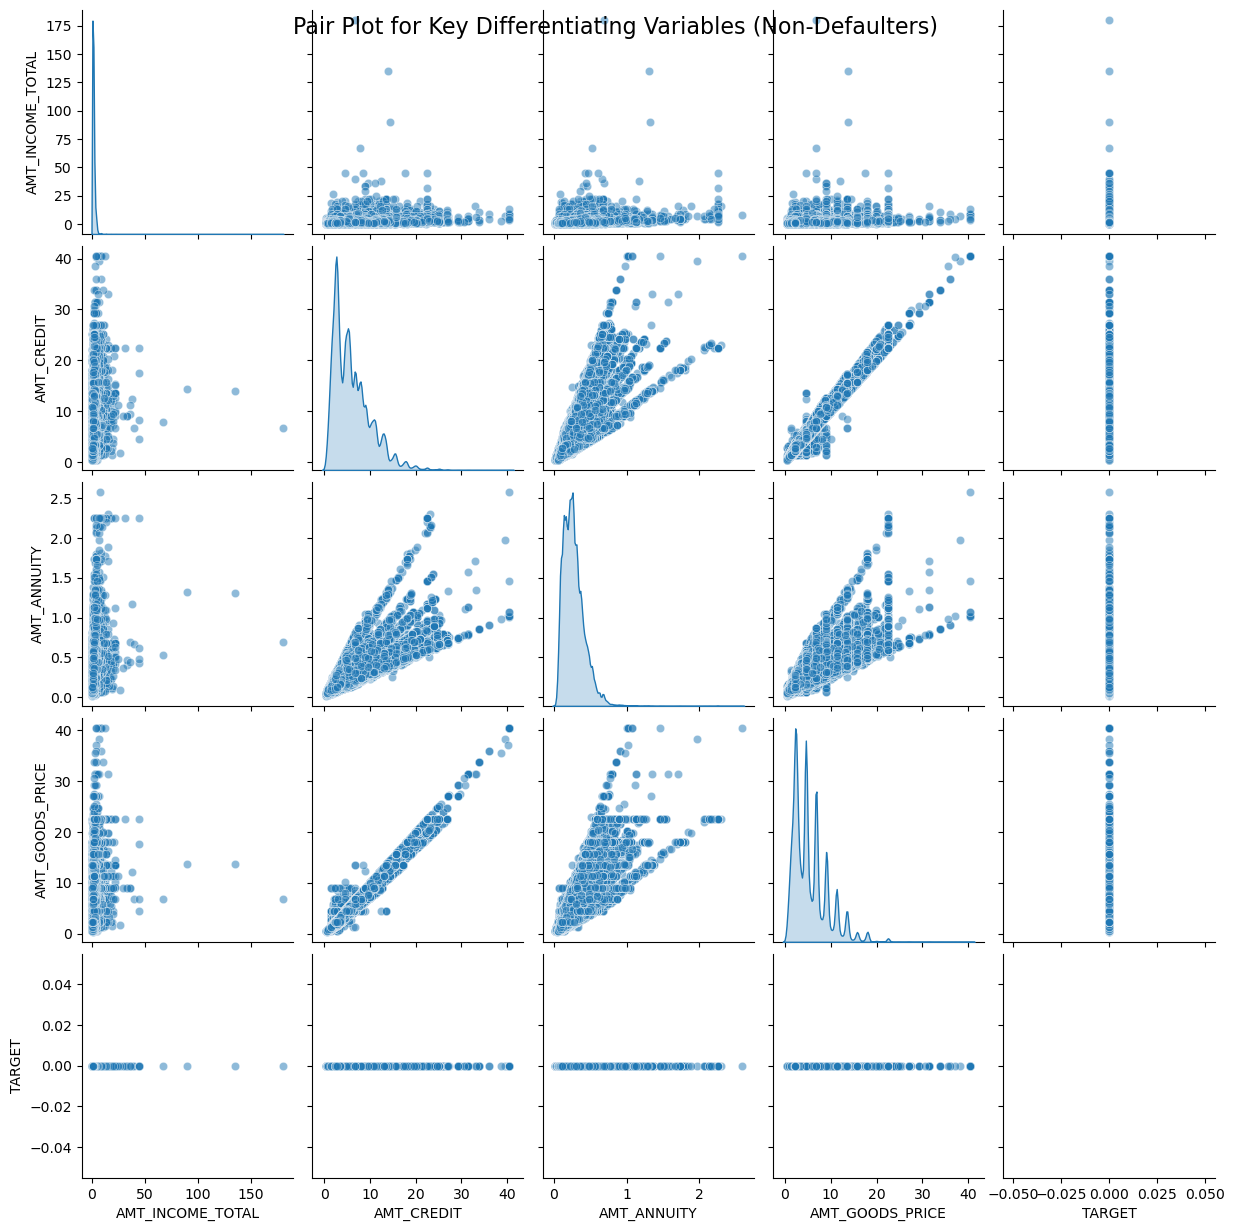

In [258]:
# Pair plot for non-defaulters
sns.pairplot(non_defaulters[selected_features], diag_kind="kde", plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot for Key Differentiating Variables (Non-Defaulters)", fontsize=16)
plt.show()

**Observation**
AMT_CREDIT vs. AMT_GOODS_PRICE

Strong positive correlation → Higher credit amounts are closely tied to higher goods prices.
Suggests that clients tend to borrow amounts similar to the price of goods they purchase.
AMT_CREDIT vs. AMT_ANNUITY

Clear linear trend → Higher credit amounts generally lead to higher annuity payments.
Some variation exists, indicating differences in loan terms or interest rates.
AMT_INCOME_TOTAL

Shows highly skewed distribution (many points clustered at lower values).
Some extreme outliers → Certain defaulters have significantly high incomes but still default.
TARGET (Defaulters)

Binary nature confirmed (only 1s present, as this dataset is for defaulters).
No direct visual correlation with numerical features, meaning additional feature engineering may be required.

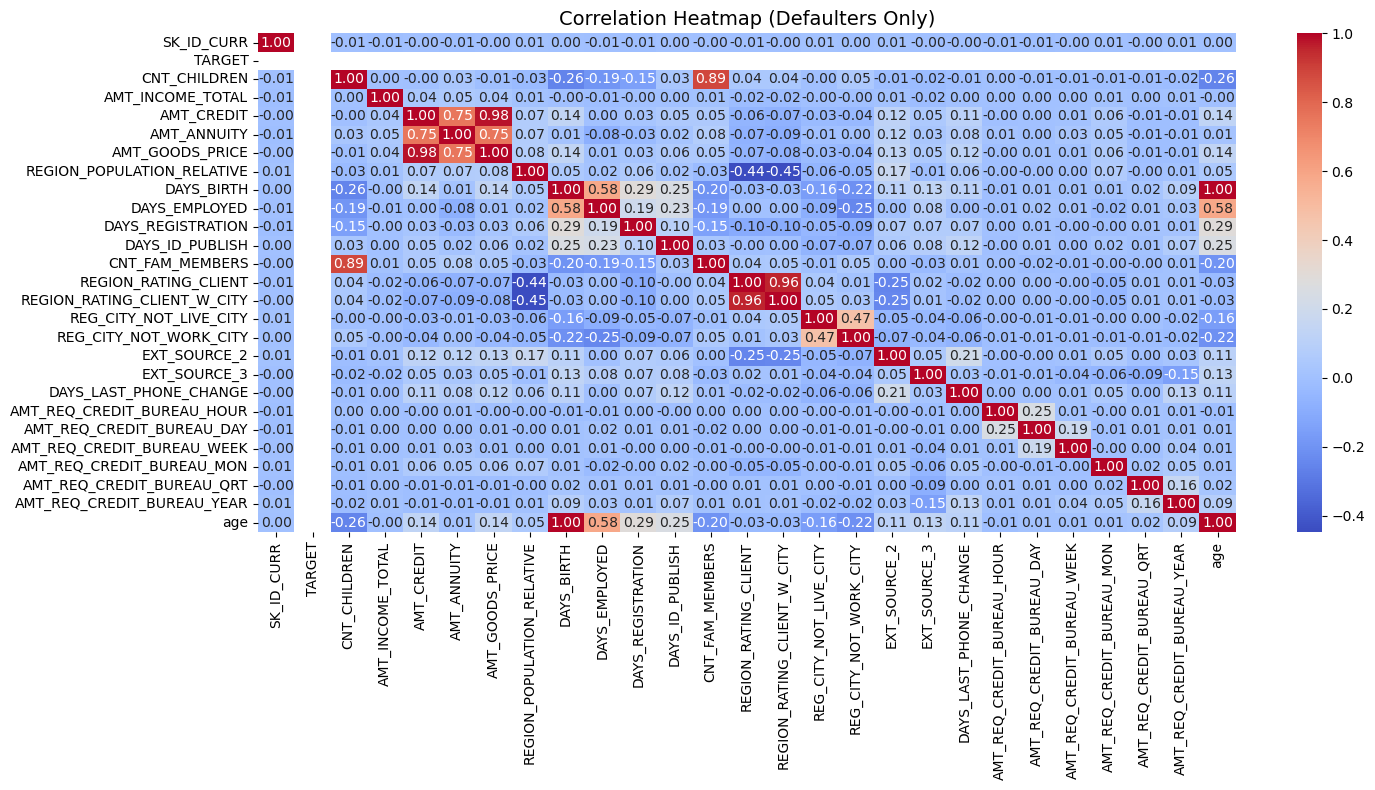

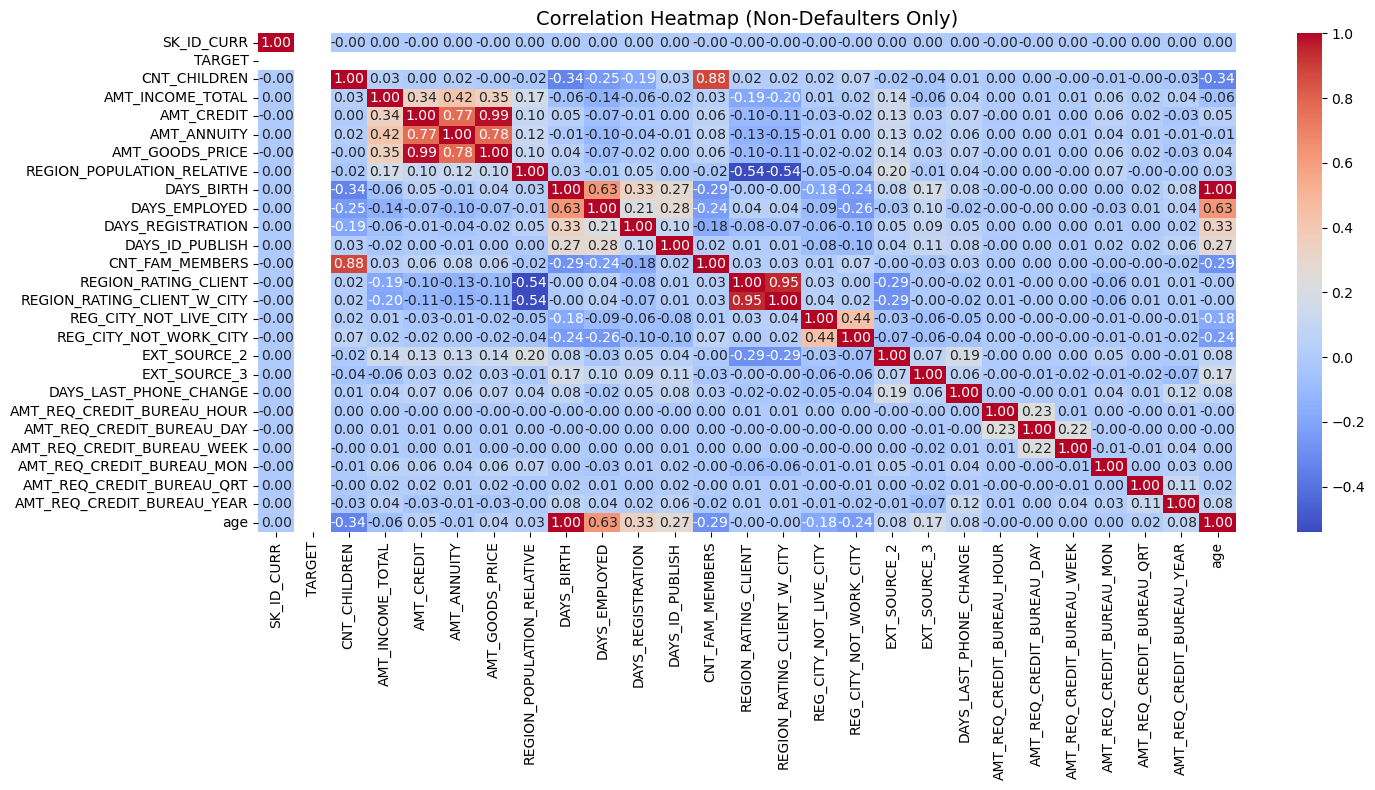

In [260]:
plt.figure(figsize=(15, 8))

# Defaulters correlation
sns.heatmap(app[app["TARGET"] == 1].select_dtypes(include=['int','float']).corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap (Defaulters Only)", fontsize=14)
plt.tight_layout()
plt.show()

# Non-defaulters correlation
plt.figure(figsize=(15, 8))
sns.heatmap(app[app["TARGET"] == 0].select_dtypes(include=['int','float']).corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap (Non-Defaulters Only)", fontsize=14)
plt.tight_layout()
plt.show()


Interpretation:

Highly correlated variables (e.g., AMT_CREDIT & AMT_GOODS_PRICE) may be redundant.
If no strong correlation with TARGET, additional feature engineering may be needed.

## Feature vs. Target Interaction

In [ ]:
features = ["AMT_INCOME_TOTAL", "AMT_CREDIT", "EXT_SOURCE_2", "EXT_SOURCE_3", "TARGET"]
sns.pairplot(app[features], hue="TARGET", palette="coolwarm")
plt.show()


 General Observations
The blue points (TARGET = 0, non-defaulters) dominate the plots, while orange points (TARGET = 1, defaulters) are sparse.
Some distributions are highly skewed, especially AMT_INCOME_TOTAL and AMT_CREDIT.
EXT_SOURCE_2 and EXT_SOURCE_3 seem to have clear density differences between defaulters and non-defaulters.

Key Insights from Variable Relationships
AMT_INCOME_TOTAL (Income) vs. Other Variables

Most data points are concentrated near lower income values.
Some extreme outliers exist beyond 1000 (likely millionaires or incorrectly recorded values).
Defaulters (orange) are spread across the income range, but many have lower incomes.
 AMT_CREDIT (Loan Amount) vs. EXT_SOURCE_2 / EXT_SOURCE_3

Loans are more densely distributed at lower values, but some outliers have very high loan amounts.
No clear separation between defaulters and non-defaulters, suggesting that loan amount alone is not a strong predictor.
Defaulters (orange) seem more frequent in mid-to-low EXT_SOURCE_2 and EXT_SOURCE_3 scores.
 EXT_SOURCE_2 and EXT_SOURCE_3 (External Risk Scores)

EXT_SOURCE_2 and EXT_SOURCE_3 are strongly correlated (suggests they measure similar aspects of risk).
Higher values of EXT_SOURCE_2 and EXT_SOURCE_3 are associated with fewer defaults.
Many defaulters (orange) have lower EXT_SOURCE_2 & EXT_SOURCE_3 values.


### Feature Engineering

In [ ]:
import pandas as pd
import numpy as np

# Assuming `df` is your application dataset
df = app.copy()

# 1. Debt-to-Income Ratio (DTI)
df['Debt_to_Income_Ratio'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']

# 2. Annuity-to-Income Ratio (AIR)
df['Annuity_to_Income_Ratio'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']

# 3. Credit-to-Goods Price Ratio (CGPR)
df['Credit_to_Goods_Price_Ratio'] = df['AMT_CREDIT'] / df['AMT_GOODS_PRICE']

# 4. Annuity-to-Credit Ratio (ACR)
df['Annuity_to_Credit_Ratio'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']

# 5. Employment Stability (EMP_STAB)
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'] // 365  # Convert days to years
df['AGE'] = abs(df['DAYS_BIRTH']) // 365  # Convert birth days to age
df['Employment_Stability'] = df['YEARS_EMPLOYED'] / df['AGE']
df.drop(columns=['YEARS_EMPLOYED', 'AGE'], inplace=True)  # Drop intermediate columns

# 6. Credit-to-Age Ratio (CAR)
df['Credit_to_Age_Ratio'] = df['AMT_CREDIT'] / (abs(df['DAYS_BIRTH']) / 365)

# 7. Renting Status Risk Factor (RSRF)
df['Renting_Status_Risk_Factor'] = np.where(df['NAME_HOUSING_TYPE'] == 'Rented apartment', 1, 0)

# 8. Family Size Risk Factor (FSRF)
df['Family_Size_Risk_Factor'] = np.where(df['CNT_FAM_MEMBERS'] > 4, 1, 0)

# Display the first few rows to check
df[['Debt_to_Income_Ratio', 'Annuity_to_Income_Ratio', 'Credit_to_Goods_Price_Ratio', 
    'Annuity_to_Credit_Ratio', 'Employment_Stability', 'Credit_to_Age_Ratio', 
    'Renting_Status_Risk_Factor', 'Family_Size_Risk_Factor']].head()


In [ ]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df[df["TARGET"] == 0]["Debt_to_Income_Ratio"], label="Non-Defaulters", shade=True)
sns.kdeplot(df[df["TARGET"] == 1]["Debt_to_Income_Ratio"], label="Defaulters", shade=True)
plt.title("Loan-to-Income Ratio Distribution: Defaulters vs. Non-Defaulters")
plt.xlabel("Loan-to-Income Ratio")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of engineered features
engineered_features = [
    "Debt_to_Income_Ratio", "Annuity_to_Income_Ratio", "Credit_to_Goods_Price_Ratio",
    "Annuity_to_Credit_Ratio", "Employment_Stability", "Credit_to_Age_Ratio",
    "Renting_Status_Risk_Factor", "Family_Size_Risk_Factor", "TARGET"
]

# Subset dataset with relevant features
correlation_df = df[engineered_features]

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Engineered Features vs Loan Default")
plt.show()


Features with Strong Correlation (among themselves)
**Debt_to_Income_Ratio & Annuity_to_Income_Ratio (0.79)**
→ Higher debt compared to income is strongly linked with a higher annuity-to-income ratio.
Debt_to_Income_Ratio & Credit_to_Age_Ratio (0.55)
→ Borrowers with higher credit exposure compared to their age also tend to have a higher debt burden.

2️⃣ **Relationship with Loan Default (TARGET)**
Credit_to_Goods_Price_Ratio (0.07)
Slight positive correlation, meaning borrowers with a higher credit-to-goods price ratio are slightly more likely to default.
Debt_to_Income_Ratio (-0.01) and Annuity_to_Income_Ratio (0.01)
Almost no correlation with default, implying these factors alone are not strong predictors.
Employment Stability (-0.04)
Weak negative correlation, indicating that employment tenure is not a strong determinant of default.
Annuity_to_Credit_Ratio (0.01) and Credit_to_Age_Ratio (0.00)
Minimal impact on loan default probability.

3️⃣ Key Insights
No feature shows a strong direct correlation with TARGET, meaning loan default risk is likely influenced by multiple combined factors rather than a single variable.
Debt-to-Income Ratio & Credit-to-Age Ratio have high internal correlation but do not individually explain default risk.
Employment stability and renting status show negligible impact, suggesting loan default is less tied to job tenure or homeownership.

## Previous Application Data

In [ ]:
#loading previous application data
prev_data = pd.read_csv('previous_application.csv')
prev_data.head()

In [ ]:
prev_data.info()

**check for null value**

In [ ]:
prev_data.shape

In [ ]:
prev_data.isna().sum()

In [ ]:
prev_data.isna().mean()*100

**Treating missing values by dropping columns more than 40% missing values**

In [ ]:
#dropping all the columns which has missing value more than 40%
prev_data = prev_data.drop(prev_data.columns[prev_data.isnull().mean() >= 0.4], axis = 1)

WEEKDAY_APPR_PROCESS_START → Day of loan application, unlikely to impact default risk.
HOUR_APPR_PROCESS_START → Hour of application, minimal relevance.
FLAG_LAST_APPL_PER_CONTRACT → Redundant contract info.
NFLAG_LAST_APPL_IN_DAY → Doesn't contribute to credit risk assessment.
SELLERPLACE_AREA → Seller location has low predictive value.
PRODUCT_COMBINATION → Complex categorical data with limited impact.

# Imputation Summary Table  

| Column Name        | Imputation Method | Reasoning                                      |  
|--------------------|------------------|------------------------------------------------|  
| **AMT_ANNUITY**    | Median           | Handles skewed distribution & outliers.       |  
| **AMT_CREDIT**     | Mean             | Assumes normal distribution for better approximation. |  
| **AMT_GOODS_PRICE** | Median           | Avoids impact of extreme values.              |  
| **CNT_PAYMENT**    | Median           | Deals with missing values while preserving distribution. |  


In [ ]:
# dropping columns whicha are not significant for the analysis.
cols_to_be_deleted = ['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT', 
                      'NFLAG_LAST_APPL_IN_DAY','SELLERPLACE_AREA','PRODUCT_COMBINATION']

prev_data = prev_data.drop(cols_to_be_deleted, axis = 1)

In [ ]:
#checking for missing value percentage row wise if 50% columns have missing values
len(prev_data[round(100*(prev_data.isnull().sum(axis = 1) / len(prev_data.columns)),2) >= 50].index)

In [ ]:
#removing the rows where AMT_ANNUITY, AMT_GOODS_PRICE and CNT_PAYMENT all have missing values as the number of rows are not very 
#large compare to the original data frame
prev_data = prev_data[~(np.isnan(prev_data['AMT_ANNUITY']) & np.isnan(prev_data['AMT_GOODS_PRICE']) & np.isnan(prev_data['CNT_PAYMENT']))]
prev_data.shape

In [ ]:
# Median imputation for relevant columns
prev_data['AMT_ANNUITY'].fillna(prev_data['AMT_ANNUITY'].median(), inplace=True)
prev_data['AMT_CREDIT'].fillna(prev_data['AMT_CREDIT'].mean(), inplace=True)
prev_data['AMT_GOODS_PRICE'].fillna(prev_data['AMT_GOODS_PRICE'].median(), inplace=True)
prev_data['CNT_PAYMENT'].fillna(prev_data['CNT_PAYMENT'].median(), inplace=True)


In [ ]:
#checking for missing value perventage columns wise after removing the rows
prev_data.isna().mean()*100

### Outlier Analysis
For the columns AMT_ANNUITY, AMT_GOODS_PRICE and CNT_PAYMENT , let's plot outliers for better understanding.

In [ ]:
col=["AMT_ANNUITY", "AMT_GOODS_PRICE" , "CNT_PAYMENT"]

In [ ]:
plt.figure(figsize=(15, 5))

# Create boxplots for each column
for i, col in enumerate(col, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=prev_data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
#understanding outliers using percentile
outlier_cols = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']

# Display percentiles for each column
for col in outlier_cols:
    print(f"Percentile distribution for {col}:\n")
    print(prev_data[col].quantile([0.1, 0.25, 0.3, 0.5, 0.6, 0.75, 0.8, 0.9, 0.99]))
    print("\n" + "="*50 + "\n")

# Percentile Distribution Summary  

| Percentile | AMT_ANNUITY  | AMT_GOODS_PRICE | CNT_PAYMENT |  
|------------|-------------|----------------|-------------|  
| **10%**    | 3,876.44    | 31,266.00      | 0.0         |  
| **25%**    | 6,475.10    | 53,199.00      | 6.0         |  
| **30%**    | 7,277.99    | 64,710.00      | 10.0        |  
| **50% (Median)** | 11,250.00 | 112,320.00    | 12.0        |  
| **60%**    | 13,500.00   | 135,000.00     | 12.0        |  
| **75%**    | 20,250.00   | 228,933.00     | 24.0        |  
| **80%**    | 23,124.65   | 301,500.00     | 24.0        |  
| **90%**    | 34,122.60   | 567,000.00     | 36.0        |  
| **99%**    | 69,158.70   | 1,372,500.00   | 60.0        |  

we can see huge difference between 9th and 99th percentile, we can cap to avoid outliers


## Merging the data sets

In [ ]:
## Perform inner join and avoid duplicate columns
finaldf = prev_data.merge(app, on='SK_ID_CURR', how='inner', suffixes=('_prev', '_app'))

# Display the shape and check column names
print(f"Shape of merged dataset: {finaldf.shape}")
print(f"Columns in final dataset: {finaldf.columns.tolist()}")


In [ ]:
finaldf.info()

In [ ]:
finaldf.drop(
    [
        'REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
        'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
        'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
        'AMT_REQ_CREDIT_BUREAU_YEAR'
    ],
    axis=1,
    inplace=True,
    errors='ignore'  # Prevents errors if a column doesn't exist
)

# Verify the new shape
print(f"Updated dataset shape: {finaldf.shape}")


In [ ]:
finaldf.shape

In [ ]:

#Extracting the imbalance percentage
Repayment_Status = finaldf['TARGET'].value_counts(normalize=True)*100
Repayment_Status

In [ ]:
sns.barplot(x=Repayment_Status,y=["Non-Defaulters","Defaulters"])
plt.title('Distribution of Defaulters vs. Non-Defaulters')
plt.show()


## Analysis

In [ ]:
catagory=finaldf.select_dtypes(include=['object']).columns
catagory

Visualising bar graph for selected features

In [ ]:
selected_features=["NAME_CONTRACT_STATUS","NAME_CONTRACT_TYPE_prev","NAME_CASH_LOAN_PURPOSE","CODE_REJECT_REASON"]
# Set figure size dynamically
plt.figure(figsize=(12, 5 * len(selected_features)))

# Loop through each categorical feature and generate bar plots
for i, feature in enumerate(selected_features, 1):
    plt.subplot(len(selected_features), 1, i)
    
    # Filter out 'XAP' and 'XNA' values
    tempdf = finaldf[~finaldf[feature].isin(["XAP", "XNA"])]

    # Aggregate default counts per category
    tempdf = tempdf[['TARGET', feature]].groupby([feature], as_index=False).sum()
    tempdf.sort_values(by='TARGET', ascending=False, inplace=True)

    # Plot bar chart
    sns.barplot(x=feature, y='TARGET', data=tempdf, palette="muted")
    plt.title(f'Defaults by {feature}\n', fontdict={'fontsize': 18, 'fontweight': 5, 'color': 'Brown'})
    plt.xlabel(feature.replace('_', ' '))
    plt.ylabel('Number of Defaulters')
    plt.xticks(rotation=45, ha='right')
# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

**Observation**
* Most of the loan is approved
* Majority of default loans are consumer loans.
* Repairs, urgent needs were the cause given for loan
* Majority Reason for rejection HC,limit

## Multivariate Analysis

In [ ]:
cor=finaldf.select_dtypes(include=['int','float']).columns

In [ ]:
corr_matrix=finaldf[cor].corr()

In [ ]:

# Plot heatmap
strong_corr = corr_matrix[abs(corr_matrix) > 0.2]

# Remove self-correlations (diagonal 1.0)
strong_corr = strong_corr.dropna(how='all').dropna(axis=1, how='all')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(strong_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Filtered Correlation Heatmap (Only Strong Correlations)")
plt.show()


**Correlation Heatmap Analysis**

Overview
The heatmap visualizes strong correlations among numerical features in the dataset. The color intensity represents the strength and direction of relationships between variables. Positive correlations are shown in shades of red, while negative correlations appear in shades of blue.

 Key Observations

Strong Positive Correlations:
1. **`AMT_APPLICATION` vs `AMT_CREDIT_prev` (0.97)**  
   - A nearly perfect correlation suggests that the amount applied for in previous loans is strongly linked to the credit amount received.
   
2. **`AMT_CREDIT_prev` vs `AMT_GOODS_PRICE_prev` (0.98)**  
   - Indicates that the credit amount aligns closely with the price of goods financed through previous loans.
   
3. **`AMT_ANNUITY_prev` vs `AMT_APPLICATION` (0.81)**  
   - Higher loan applications tend to result in higher annuity payments.

4. **`CNT_FAM_MEMBERS` vs `CNT_CHILDREN` (0.88)**  
   - As expected, larger families tend to have more children.

Negative Correlations:
1. **`DAYS_BIRTH` vs `TARGET` (-0.36)**  
   - Younger individuals are more likely to default, as the correlation with the target variable is negative.
   
2. **`DAYS_BIRTH` vs `DAYS_EMPLOYED` (-0.25)**  
   - Older individuals have longer employment durations, which makes sense given career progression over time.

Other Insights:
- **`DAYS_DECISION` has a mild correlation (~0.30) with credit-related variables**, suggesting that the time taken to approve a loan might depend on the loan amount or type.
- **Loan-related variables (`AMT_CREDIT`, `AMT_APPLICATION`, `AMT_GOODS_PRICE`) are highly correlated**, reinforcing the idea that these amounts move together in credit applications.

Business Implications:
- Lenders should **consider age as a risk factor**, as younger applicants show higher default rates.
- **Loan approvals and annuity structuring should be optimized** based on strong correlations between application amounts, credit granted, and goods prices.
- Family size and number of children could be **used as secondary risk indicators** when evaluating a clients ability to repay.



## Summary

**Final Summary and Recommendations**

**Key Findings from the Exploratory Data Analysis (EDA)**

1. Income and Credit Amount Insights  
- AMT_INCOME_TOTAL and AMT_CREDIT distributions are highly skewed, with extreme outliers.  
- Most applicants have low to moderate income, and defaulters exist across all income levels.  
- Loan amount alone does not show a strong separation between defaulters and non-defaulters.  

 2. Risk Score Analysis (EXT_SOURCE_2 & EXT_SOURCE_3)  
- These external risk scores are highly correlated and strongly impact default probability.  
- Lower scores are associated with a higher likelihood of default, making them key predictive features.  
- Defaulters tend to have lower EXT_SOURCE_2 and EXT_SOURCE_3 values compared to non-defaulters.  

3. Outliers and Data Quality Issues  
- Some extreme outliers in income and credit amounts may distort analysis and model performance.  
- Missing values in external sources need to be handled carefully, as they contain crucial risk information.  

4. Univariate and Bivariate Analysis
- Age and Default Risk:
- Higher default rates were observed among applicants aged 29-40 years​
.
Income and Loan Amount:
- Majority of applicants applied for loans between 1-2L.
- AMT_INCOME_TOTAL showed a skewed distribution, with extreme outliers for high-income applicants​

Correlation Between Financial Variables:
AMT_CREDIT and AMT_GOODS_PRICE (0.98) – Applicants typically borrow amounts close to the value of the goods they purchase​

DAYS_BIRTH and TARGET (-0.36) – Younger applicants have higher default rates​

CNT_FAM_MEMBERS and CNT_CHILDREN (0.88) – Larger families tend to have more children, which could impact financial stability​

4. Key Risk Indicators
- Occupation and Default Probability:
- Low-skilled laborers and transport sector employees showed higher default rates due to income instability​

Housing and Default Risk:
-Renters were more likely to default than homeowners, indicating lower financial stability​

Marital and Education Status:
- Applicants with lower secondary education and those in civil marriages had higher default rates​

**Business Recommendations**

- Target High-Risk Age Groups: Lenders should be cautious while approving loans for applicants in the 29-40 age group, as they have higher default tendencies.
- Consider Family Size in Risk Assessment: Since larger families tend to have more financial responsibilities, family size should be factored into risk assessment models.
- Improve Income Verification for Certain Occupations: Enhanced income validation policies should be applied for low-skilled laborers and transport workers to mitigate default risk.
- Custom Repayment Plans for Renters: Since renters have a higher probability of default, lenders should introduce customized loan products with flexible repayment structures.

